In [ ]:
!pip install tensorflow

In [ ]:
!pip install scikeras

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import multiprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, confusion_matrix, precision_score, recall_score, f1_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from scikeras.wrappers import KerasClassifier

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow import convert_to_tensor
from sklearn.model_selection import GridSearchCV
from tensorflow.keras import optimizers

import joblib  


In [77]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 1000000

In [4]:
df = pd.read_csv('df_del_nan_v2.csv')

In [5]:
df.head()

,winner,Height_0,Weight_0,Reach_0,W_0,L_0,D_0,SLpM_0,Str. Acc._0,SApM_0,Str. Def_0,TD Avg._0,TD Acc._0,TD Def._0,Sub. Avg._0,ufc_bouts_0,edad_pelea_0,St_0_Open Stance,St_0_Orthodox,St_0_Southpaw,St_0_Switch,Height_1,Weight_1,Reach_1,W_1,L_1,D_1,SLpM_1,Str. Acc._1,SApM_1,Str. Def_1,TD Avg._1,TD Acc._1,TD Def._1,Sub. Avg._1,edad_pelea_1,ufc_bouts_1,St_1_Open Stance,St_1_Orthodox,St_1_Southpaw,St_1_Switch
0,0,193.0,205.0,201.0,11.0,1.0,0.0,6.46,52,3.51,45,0.00,0,65,0.0,7.0,31.0,0,0,1,0,188.0,205.0,193.0,22.0,11.0,0.0,3.72,48,2.57,53,0.88,33,65,0.1,38.0,24.0,0,1,0,0
1,1,190.0,170.0,206.0,23.0,7.0,0.0,3.90,54,2.41,55,0.84,43,50,0.6,15.0,26.0,0,1,0,0,188.0,205.0,193.0,22.0,11.0,0.0,3.72,48,2.57,53,0.88,33,65,0.1,34.0,24.0,0,1,0,0
2,0,193.0,205.0,198.0,14.0,3.0,0.0,4.01,50,2.30,53,0.82,25,90,0.2,8.0,29.0,0,1,0,0,188.0,205.0,193.0,22.0,11.0,0.0,3.72,48,2.57,53,0.88,33,65,0.1,37.0,24.0,0,1,0,0
3,1,198.0,205.0,208.0,18.0,7.0,0.0,3.45,58,2.78,42,0.23,100,62,0.7,8.0,29.0,0,1,0,0,188.0,205.0,193.0,22.0,11.0,0.0,3.72,48,2.57,53,0.88,33,65,0.1,37.0,24.0,0,1,0,0
4,1,188.0,205.0,198.0,29.0,9.0,0.0,3.55,49,2.77,54,1.08,53,66,0.3,18.0,36.0,0,1,0,0,188.0,205.0,193.0,22.0,11.0,0.0,3.72,48,2.57,53,0.88,33,65,0.1,35.0,24.0,0,1,0,0


In [6]:
df.shape

(5668, 41)

In [7]:
scaler = MinMaxScaler()
scaler.fit(df)
df[df.columns] = scaler.transform(df)

In [8]:
df.head()

,winner,Height_0,Weight_0,Reach_0,W_0,L_0,D_0,SLpM_0,Str. Acc._0,SApM_0,Str. Def_0,TD Avg._0,TD Acc._0,TD Def._0,Sub. Avg._0,ufc_bouts_0,edad_pelea_0,St_0_Open Stance,St_0_Orthodox,St_0_Southpaw,St_0_Switch,Height_1,Weight_1,Reach_1,W_1,L_1,D_1,SLpM_1,Str. Acc._1,SApM_1,Str. Def_1,TD Avg._1,TD Acc._1,TD Def._1,Sub. Avg._1,edad_pelea_1,ufc_bouts_1,St_1_Open Stance,St_1_Orthodox,St_1_Southpaw,St_1_Switch
0,0.0,0.694915,0.600000,0.818182,0.120879,0.038462,0.0,0.687842,0.611111,0.223647,0.375000,0.000000,0.00,0.65,0.000000,0.153846,0.407407,0.0,0.0,1.0,0.0,0.610169,0.6,0.69697,0.241758,0.423077,0.0,0.297729,0.537313,0.145599,0.561644,0.078083,0.33,0.65,0.013514,0.655172,0.589744,0.0,1.0,0.0,0.0
1,1.0,0.644068,0.366667,0.893939,0.252747,0.269231,0.0,0.407448,0.638889,0.145299,0.531250,0.076503,0.43,0.50,0.081081,0.358974,0.222222,0.0,1.0,0.0,0.0,0.610169,0.6,0.69697,0.241758,0.423077,0.0,0.297729,0.537313,0.145599,0.561644,0.078083,0.33,0.65,0.013514,0.517241,0.589744,0.0,1.0,0.0,0.0
2,0.0,0.694915,0.600000,0.772727,0.153846,0.115385,0.0,0.419496,0.583333,0.137464,0.500000,0.074681,0.25,0.90,0.027027,0.179487,0.333333,0.0,1.0,0.0,0.0,0.610169,0.6,0.69697,0.241758,0.423077,0.0,0.297729,0.537313,0.145599,0.561644,0.078083,0.33,0.65,0.013514,0.620690,0.589744,0.0,1.0,0.0,0.0
3,1.0,0.779661,0.600000,0.924242,0.197802,0.269231,0.0,0.358160,0.694444,0.171652,0.328125,0.020947,1.00,0.62,0.094595,0.179487,0.333333,0.0,1.0,0.0,0.0,0.610169,0.6,0.69697,0.241758,0.423077,0.0,0.297729,0.537313,0.145599,0.561644,0.078083,0.33,0.65,0.013514,0.620690,0.589744,0.0,1.0,0.0,0.0
4,1.0,0.610169,0.600000,0.772727,0.318681,0.346154,0.0,0.369113,0.569444,0.170940,0.515625,0.098361,0.53,0.66,0.040541,0.435897,0.592593,0.0,1.0,0.0,0.0,0.610169,0.6,0.69697,0.241758,0.423077,0.0,0.297729,0.537313,0.145599,0.561644,0.078083,0.33,0.65,0.013514,0.551724,0.589744,0.0,1.0,0.0,0.0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:],
                                        df['winner'],
                                        test_size = 0.2,
                                        random_state = 19,
                                        shuffle = True
                                    )

In [18]:
def create_model(neurons = 30, layers = 3, activation = 'relu', optimizer = 'adam', batch_size = 30, epochs = 30):
    
    model = Sequential()

    l1 = Dense(units = neurons, input_shape=(40, ))
    model.add(l1)

    for i in range(1, layers):
        l2 = Dense(units = neurons, activation = activation)
        model.add(l2)
    
    out = Dense(units = 2, activation='sigmoid')
    model.add(out)
    
    model.compile(optimizer = optimizer, loss='binary_crossentropy', metrics = ["accuracy"])
    
    hist = model.fit(x = convert_to_tensor(X_train), 
                     y = to_categorical(convert_to_tensor(y_train), num_classes = 2), 
                                        batch_size = batch_size, 
                                        validation_split = 0.1, 
                                        epochs = epochs)

    return model

def plot_metric(history, metric):
    history_dict = history.history
    values = history_dict[metric]
    if 'val_' + metric in history_dict.keys():  
        val_values = history_dict['val_' + metric]

    epochs = range(1, len(values) + 1)

    if 'val_' + metric in history_dict.keys():  
        plt.plot(epochs, val_values, label='Validation')
    plt.semilogy(epochs, values, label='Training')

    if 'val_' + metric in history_dict.keys():  
        plt.title('Training and validation %s' % metric)
    else:
        plt.title('Training %s' % metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()

    plt.show()

---------------------------------
SGD
---------------------------------
Epoch 1/30
136/136 [==============================] - 1s 3ms/step - loss: 0.7011 - accuracy: 0.5262 - val_loss: 0.6865 - val_accuracy: 0.5595
Epoch 2/30
136/136 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5304 - val_loss: 0.6842 - val_accuracy: 0.5683
Epoch 3/30
136/136 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.5395 - val_loss: 0.6829 - val_accuracy: 0.5771
Epoch 4/30
136/136 [==============================] - 0s 3ms/step - loss: 0.6878 - accuracy: 0.5407 - val_loss: 0.6820 - val_accuracy: 0.5903
Epoch 5/30
136/136 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.5456 - val_loss: 0.6808 - val_accuracy: 0.5903
Epoch 6/30
136/136 [==============================] - 0s 2ms/step - loss: 0.6859 - accuracy: 0.5453 - val_loss: 0.6799 - val_accuracy: 0.5925
Epoch 7/30
136/136 [==============================] - 0s 2ms/step - loss: 0.

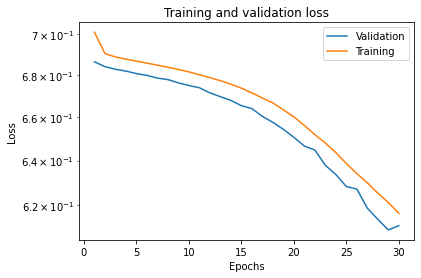

---------------------------------
RMSprop
---------------------------------
Epoch 1/30
136/136 [==============================] - 1s 2ms/step - loss: 0.6844 - accuracy: 0.5620 - val_loss: 0.6630 - val_accuracy: 0.6145
Epoch 2/30
136/136 [==============================] - 0s 2ms/step - loss: 0.6577 - accuracy: 0.6262 - val_loss: 0.6229 - val_accuracy: 0.6564
Epoch 3/30
136/136 [==============================] - 0s 2ms/step - loss: 0.6223 - accuracy: 0.6598 - val_loss: 0.5946 - val_accuracy: 0.6828
Epoch 4/30
136/136 [==============================] - 0s 2ms/step - loss: 0.6014 - accuracy: 0.6735 - val_loss: 0.5729 - val_accuracy: 0.6916
Epoch 5/30
136/136 [==============================] - 0s 2ms/step - loss: 0.5912 - accuracy: 0.6882 - val_loss: 0.5735 - val_accuracy: 0.7093
Epoch 6/30
136/136 [==============================] - 0s 2ms/step - loss: 0.5846 - accuracy: 0.6931 - val_loss: 0.5815 - val_accuracy: 0.6938
Epoch 7/30
136/136 [==============================] - 0s 2ms/step - loss

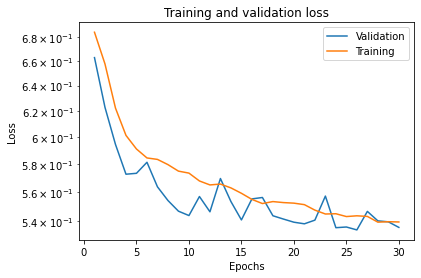

---------------------------------
Adam
---------------------------------
Epoch 1/30
136/136 [==============================] - 1s 3ms/step - loss: 0.6664 - accuracy: 0.6100 - val_loss: 0.6351 - val_accuracy: 0.6278
Epoch 2/30
136/136 [==============================] - 0s 2ms/step - loss: 0.6106 - accuracy: 0.6703 - val_loss: 0.5776 - val_accuracy: 0.6872
Epoch 3/30
136/136 [==============================] - 0s 2ms/step - loss: 0.5908 - accuracy: 0.6897 - val_loss: 0.5610 - val_accuracy: 0.7115
Epoch 4/30
136/136 [==============================] - 0s 2ms/step - loss: 0.5841 - accuracy: 0.6958 - val_loss: 0.5561 - val_accuracy: 0.6982
Epoch 5/30
136/136 [==============================] - 0s 2ms/step - loss: 0.5799 - accuracy: 0.6988 - val_loss: 0.5635 - val_accuracy: 0.6982
Epoch 6/30
136/136 [==============================] - 0s 3ms/step - loss: 0.5835 - accuracy: 0.6934 - val_loss: 0.5698 - val_accuracy: 0.6872
Epoch 7/30
136/136 [==============================] - 0s 2ms/step - loss: 0

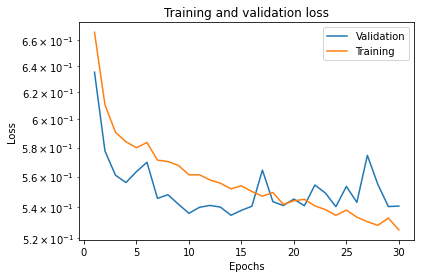

---------------------------------
Nadam
---------------------------------
Epoch 1/30
136/136 [==============================] - 1s 4ms/step - loss: 0.6817 - accuracy: 0.5716 - val_loss: 0.6524 - val_accuracy: 0.6013
Epoch 2/30
136/136 [==============================] - 0s 2ms/step - loss: 0.6378 - accuracy: 0.6490 - val_loss: 0.6065 - val_accuracy: 0.6872
Epoch 3/30
136/136 [==============================] - 0s 2ms/step - loss: 0.6041 - accuracy: 0.6777 - val_loss: 0.5774 - val_accuracy: 0.6960
Epoch 4/30
136/136 [==============================] - 0s 2ms/step - loss: 0.5918 - accuracy: 0.6853 - val_loss: 0.5648 - val_accuracy: 0.7004
Epoch 5/30
136/136 [==============================] - 0s 2ms/step - loss: 0.5865 - accuracy: 0.6897 - val_loss: 0.5887 - val_accuracy: 0.6762
Epoch 6/30
136/136 [==============================] - 0s 2ms/step - loss: 0.5792 - accuracy: 0.6990 - val_loss: 0.5640 - val_accuracy: 0.6938
Epoch 7/30
136/136 [==============================] - 0s 2ms/step - loss: 

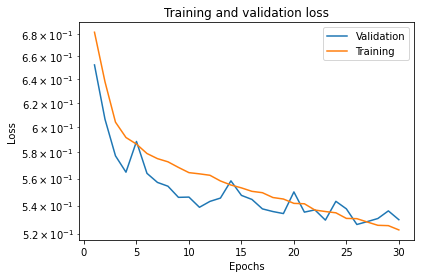

In [19]:
#Eleccion del optimizador

op_optimizer = ['SGD', 'RMSprop', 'Adam', 'Nadam']
models_optimizer = []

for optimizer in op_optimizer:
    print('---------------------------------')
    print(f'{optimizer}')
    print('---------------------------------')
    
    model = create_model(optimizer = optimizer)
    plot_metric(model.history, 'loss')
    models_optimizer.append((optimizer, max(model.history.history['val_accuracy'])))

In [20]:
models_optimizer

[('SGD', 0.6938325762748718),
 ('RMSprop', 0.7246695756912231),
 ('Adam', 0.7356828451156616),
 ('Nadam', 0.7334801554679871)]

## Selecciono Adam por su grafica de loss y su accuracy

---------------------------------
relu
---------------------------------
Epoch 1/30
136/136 [==============================] - 1s 4ms/step - loss: 0.6729 - accuracy: 0.5929 - val_loss: 0.6349 - val_accuracy: 0.6806
Epoch 2/30
136/136 [==============================] - 1s 4ms/step - loss: 0.6239 - accuracy: 0.6522 - val_loss: 0.5933 - val_accuracy: 0.6586
Epoch 3/30
136/136 [==============================] - 0s 3ms/step - loss: 0.5982 - accuracy: 0.6775 - val_loss: 0.5843 - val_accuracy: 0.6916
Epoch 4/30
136/136 [==============================] - 0s 3ms/step - loss: 0.5828 - accuracy: 0.6931 - val_loss: 0.5515 - val_accuracy: 0.7159
Epoch 5/30
136/136 [==============================] - 0s 3ms/step - loss: 0.5763 - accuracy: 0.6968 - val_loss: 0.5486 - val_accuracy: 0.7048
Epoch 6/30
136/136 [==============================] - 0s 3ms/step - loss: 0.5710 - accuracy: 0.7049 - val_loss: 0.5390 - val_accuracy: 0.7269
Epoch 7/30
136/136 [==============================] - 0s 3ms/step - loss: 0

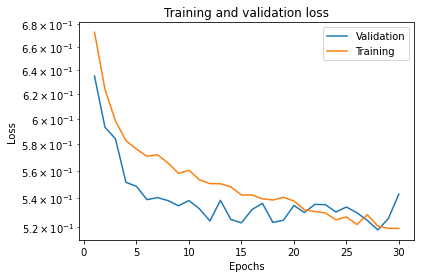

---------------------------------
elu
---------------------------------
Epoch 1/30
136/136 [==============================] - 1s 6ms/step - loss: 0.6722 - accuracy: 0.5887 - val_loss: 0.6289 - val_accuracy: 0.6784
Epoch 2/30
136/136 [==============================] - 0s 3ms/step - loss: 0.6184 - accuracy: 0.6669 - val_loss: 0.5839 - val_accuracy: 0.6916
Epoch 3/30
136/136 [==============================] - 0s 2ms/step - loss: 0.5906 - accuracy: 0.6875 - val_loss: 0.5622 - val_accuracy: 0.7070
Epoch 4/30
136/136 [==============================] - 0s 2ms/step - loss: 0.5828 - accuracy: 0.6914 - val_loss: 0.5646 - val_accuracy: 0.6982
Epoch 5/30
136/136 [==============================] - 0s 4ms/step - loss: 0.5814 - accuracy: 0.6944 - val_loss: 0.5618 - val_accuracy: 0.7093
Epoch 6/30
136/136 [==============================] - 1s 4ms/step - loss: 0.5747 - accuracy: 0.7012 - val_loss: 0.5488 - val_accuracy: 0.7203
Epoch 7/30
136/136 [==============================] - 0s 3ms/step - loss: 0.

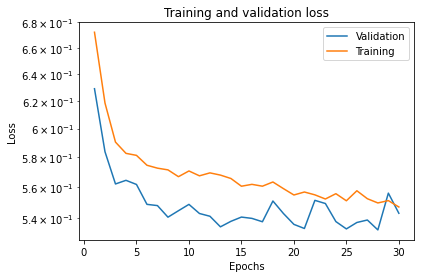

---------------------------------
leaky_relu
---------------------------------
Epoch 1/30
136/136 [==============================] - 1s 4ms/step - loss: 0.6785 - accuracy: 0.5806 - val_loss: 0.6568 - val_accuracy: 0.6079
Epoch 2/30
136/136 [==============================] - 0s 3ms/step - loss: 0.6303 - accuracy: 0.6542 - val_loss: 0.6173 - val_accuracy: 0.6388
Epoch 3/30
136/136 [==============================] - 0s 3ms/step - loss: 0.6084 - accuracy: 0.6686 - val_loss: 0.5873 - val_accuracy: 0.6960
Epoch 4/30
136/136 [==============================] - 0s 3ms/step - loss: 0.5909 - accuracy: 0.6865 - val_loss: 0.5905 - val_accuracy: 0.6674
Epoch 5/30
136/136 [==============================] - 0s 2ms/step - loss: 0.5839 - accuracy: 0.6882 - val_loss: 0.5872 - val_accuracy: 0.6894
Epoch 6/30
136/136 [==============================] - 0s 3ms/step - loss: 0.5779 - accuracy: 0.7025 - val_loss: 0.5555 - val_accuracy: 0.7026
Epoch 7/30
136/136 [==============================] - 0s 3ms/step - l

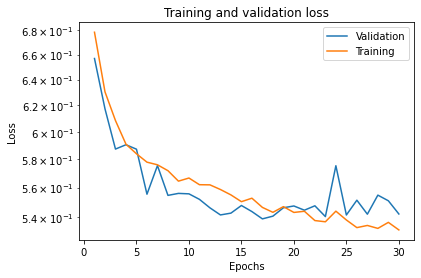

In [21]:
#Eleccion del activador

op_activator = ['relu', 'elu', 'leaky_relu']
models_activator = []

for activator in op_activator:
    print('---------------------------------')
    print(f'{activator}')
    print('---------------------------------')
    
    model = create_model(optimizer = 'Adam', activation = activator)
    plot_metric(model.history, 'loss')
    models_activator.append((activator, max(model.history.history['val_accuracy'])))

In [22]:
models_activator

[('relu', 0.7444933652877808),
 ('elu', 0.7224669456481934),
 ('leaky_relu', 0.7312775254249573)]

## Selecciono relu como activador

---------------------------------
10 neurons and 5 layers
---------------------------------
Epoch 1/30
136/136 [==============================] - 1s 4ms/step - loss: 0.6897 - accuracy: 0.5262 - val_loss: 0.6821 - val_accuracy: 0.5837
Epoch 2/30
136/136 [==============================] - 1s 4ms/step - loss: 0.6768 - accuracy: 0.5853 - val_loss: 0.6529 - val_accuracy: 0.6652
Epoch 3/30
136/136 [==============================] - 0s 3ms/step - loss: 0.6457 - accuracy: 0.6495 - val_loss: 0.6127 - val_accuracy: 0.6740
Epoch 4/30
136/136 [==============================] - 1s 4ms/step - loss: 0.6138 - accuracy: 0.6738 - val_loss: 0.5856 - val_accuracy: 0.6872
Epoch 5/30
136/136 [==============================] - 0s 3ms/step - loss: 0.5979 - accuracy: 0.6831 - val_loss: 0.5720 - val_accuracy: 0.6916
Epoch 6/30
136/136 [==============================] - 0s 3ms/step - loss: 0.5913 - accuracy: 0.6956 - val_loss: 0.5664 - val_accuracy: 0.7004
Epoch 7/30
136/136 [==============================] - 0s

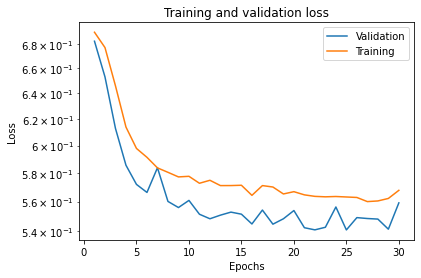

---------------------------------
10 neurons and 10 layers
---------------------------------
Epoch 1/30
136/136 [==============================] - 1s 4ms/step - loss: 0.6920 - accuracy: 0.5162 - val_loss: 0.6862 - val_accuracy: 0.5485
Epoch 2/30
136/136 [==============================] - 0s 3ms/step - loss: 0.6629 - accuracy: 0.6169 - val_loss: 0.6333 - val_accuracy: 0.6432
Epoch 3/30
136/136 [==============================] - 0s 3ms/step - loss: 0.6258 - accuracy: 0.6618 - val_loss: 0.6371 - val_accuracy: 0.6344
Epoch 4/30
136/136 [==============================] - 0s 2ms/step - loss: 0.6044 - accuracy: 0.6792 - val_loss: 0.5926 - val_accuracy: 0.6718
Epoch 5/30
136/136 [==============================] - 0s 2ms/step - loss: 0.5965 - accuracy: 0.6855 - val_loss: 0.5811 - val_accuracy: 0.6784
Epoch 6/30
136/136 [==============================] - 1s 4ms/step - loss: 0.5951 - accuracy: 0.6865 - val_loss: 0.5816 - val_accuracy: 0.6762
Epoch 7/30
136/136 [==============================] - 1

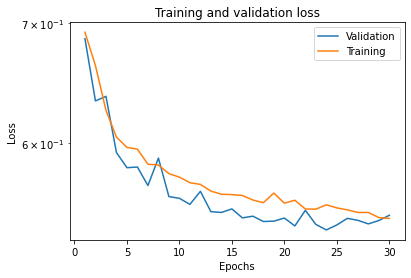

---------------------------------
10 neurons and 15 layers
---------------------------------
Epoch 1/30
136/136 [==============================] - 1s 6ms/step - loss: 0.6925 - accuracy: 0.5216 - val_loss: 0.6898 - val_accuracy: 0.5485
Epoch 2/30
136/136 [==============================] - 1s 5ms/step - loss: 0.6922 - accuracy: 0.5240 - val_loss: 0.6896 - val_accuracy: 0.5485
Epoch 3/30
136/136 [==============================] - 1s 4ms/step - loss: 0.6887 - accuracy: 0.5240 - val_loss: 0.6761 - val_accuracy: 0.5485
Epoch 4/30
136/136 [==============================] - 1s 4ms/step - loss: 0.6598 - accuracy: 0.6132 - val_loss: 0.6331 - val_accuracy: 0.6806
Epoch 5/30
136/136 [==============================] - 1s 5ms/step - loss: 0.6444 - accuracy: 0.6346 - val_loss: 0.6273 - val_accuracy: 0.6366
Epoch 6/30
136/136 [==============================] - 1s 5ms/step - loss: 0.6186 - accuracy: 0.6652 - val_loss: 0.5891 - val_accuracy: 0.6960
Epoch 7/30
136/136 [==============================] - 1

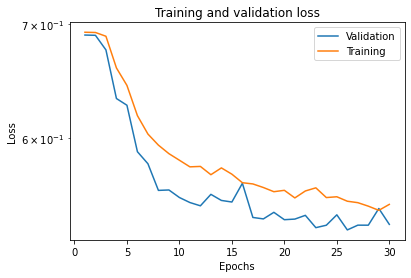

---------------------------------
10 neurons and 20 layers
---------------------------------
Epoch 1/30
136/136 [==============================] - 1s 5ms/step - loss: 0.6927 - accuracy: 0.5225 - val_loss: 0.6911 - val_accuracy: 0.5485
Epoch 2/30
136/136 [==============================] - 1s 4ms/step - loss: 0.6922 - accuracy: 0.5240 - val_loss: 0.6903 - val_accuracy: 0.5485
Epoch 3/30
136/136 [==============================] - 0s 4ms/step - loss: 0.6921 - accuracy: 0.5240 - val_loss: 0.6900 - val_accuracy: 0.5485
Epoch 4/30
136/136 [==============================] - 1s 4ms/step - loss: 0.6921 - accuracy: 0.5240 - val_loss: 0.6897 - val_accuracy: 0.5485
Epoch 5/30
136/136 [==============================] - 1s 4ms/step - loss: 0.6921 - accuracy: 0.5240 - val_loss: 0.6898 - val_accuracy: 0.5485
Epoch 6/30
136/136 [==============================] - 1s 4ms/step - loss: 0.6921 - accuracy: 0.5240 - val_loss: 0.6897 - val_accuracy: 0.5485
Epoch 7/30
136/136 [==============================] - 1

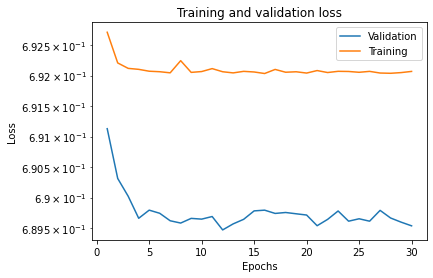

---------------------------------
10 neurons and 25 layers
---------------------------------
Epoch 1/30
136/136 [==============================] - 1s 5ms/step - loss: 0.6923 - accuracy: 0.5240 - val_loss: 0.6897 - val_accuracy: 0.5485
Epoch 2/30
136/136 [==============================] - 0s 3ms/step - loss: 0.6888 - accuracy: 0.5240 - val_loss: 0.6919 - val_accuracy: 0.5485
Epoch 3/30
136/136 [==============================] - 0s 3ms/step - loss: 0.6888 - accuracy: 0.5240 - val_loss: 0.6913 - val_accuracy: 0.5485
Epoch 4/30
136/136 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5240 - val_loss: 0.6896 - val_accuracy: 0.5485
Epoch 5/30
136/136 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5240 - val_loss: 0.6897 - val_accuracy: 0.5485
Epoch 6/30
136/136 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.5240 - val_loss: 0.6893 - val_accuracy: 0.5485
Epoch 7/30
136/136 [==============================] - 0

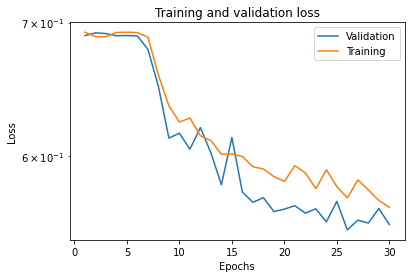

---------------------------------
20 neurons and 5 layers
---------------------------------
Epoch 1/30
136/136 [==============================] - 1s 2ms/step - loss: 0.6906 - accuracy: 0.5375 - val_loss: 0.6824 - val_accuracy: 0.5991
Epoch 2/30
136/136 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.5990 - val_loss: 0.6438 - val_accuracy: 0.6167
Epoch 3/30
136/136 [==============================] - 0s 2ms/step - loss: 0.6168 - accuracy: 0.6647 - val_loss: 0.5869 - val_accuracy: 0.6806
Epoch 4/30
136/136 [==============================] - 0s 2ms/step - loss: 0.5925 - accuracy: 0.6880 - val_loss: 0.6111 - val_accuracy: 0.6806
Epoch 5/30
136/136 [==============================] - 0s 2ms/step - loss: 0.5841 - accuracy: 0.6953 - val_loss: 0.5652 - val_accuracy: 0.7004
Epoch 6/30
136/136 [==============================] - 0s 2ms/step - loss: 0.5810 - accuracy: 0.6971 - val_loss: 0.5542 - val_accuracy: 0.6850
Epoch 7/30
136/136 [==============================] - 0s

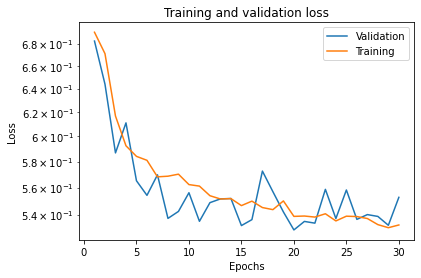

---------------------------------
20 neurons and 10 layers
---------------------------------
Epoch 1/30
136/136 [==============================] - 1s 3ms/step - loss: 0.6915 - accuracy: 0.5225 - val_loss: 0.6814 - val_accuracy: 0.5485
Epoch 2/30
136/136 [==============================] - 0s 2ms/step - loss: 0.6686 - accuracy: 0.5809 - val_loss: 0.6253 - val_accuracy: 0.6388
Epoch 3/30
136/136 [==============================] - 0s 2ms/step - loss: 0.6272 - accuracy: 0.6498 - val_loss: 0.5825 - val_accuracy: 0.7004
Epoch 4/30
136/136 [==============================] - 0s 2ms/step - loss: 0.6035 - accuracy: 0.6767 - val_loss: 0.5777 - val_accuracy: 0.6916
Epoch 5/30
136/136 [==============================] - 0s 2ms/step - loss: 0.5931 - accuracy: 0.6870 - val_loss: 0.5834 - val_accuracy: 0.6850
Epoch 6/30
136/136 [==============================] - 0s 2ms/step - loss: 0.5858 - accuracy: 0.6912 - val_loss: 0.5515 - val_accuracy: 0.7093
Epoch 7/30
136/136 [==============================] - 0

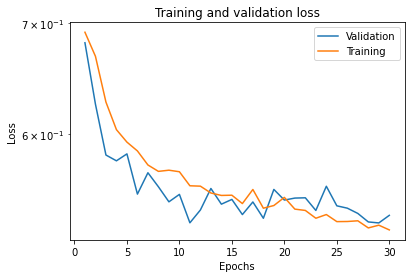

---------------------------------
20 neurons and 15 layers
---------------------------------
Epoch 1/30
136/136 [==============================] - 1s 3ms/step - loss: 0.6903 - accuracy: 0.5466 - val_loss: 0.6716 - val_accuracy: 0.6696
Epoch 2/30
136/136 [==============================] - 0s 2ms/step - loss: 0.6493 - accuracy: 0.6368 - val_loss: 0.5871 - val_accuracy: 0.6806
Epoch 3/30
136/136 [==============================] - 0s 2ms/step - loss: 0.6105 - accuracy: 0.6706 - val_loss: 0.5914 - val_accuracy: 0.7004
Epoch 4/30
136/136 [==============================] - 0s 2ms/step - loss: 0.5955 - accuracy: 0.6904 - val_loss: 0.5702 - val_accuracy: 0.7026
Epoch 5/30
136/136 [==============================] - 0s 2ms/step - loss: 0.5813 - accuracy: 0.7049 - val_loss: 0.5755 - val_accuracy: 0.7004
Epoch 6/30
136/136 [==============================] - 0s 2ms/step - loss: 0.5803 - accuracy: 0.6956 - val_loss: 0.5414 - val_accuracy: 0.7115
Epoch 7/30
136/136 [==============================] - 0

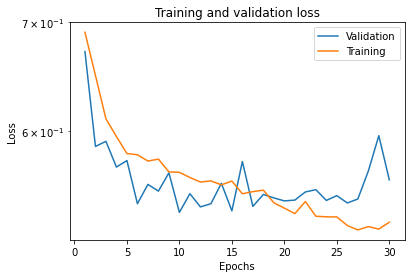

---------------------------------
20 neurons and 20 layers
---------------------------------
Epoch 1/30
136/136 [==============================] - 1s 4ms/step - loss: 0.6928 - accuracy: 0.5216 - val_loss: 0.6909 - val_accuracy: 0.5485
Epoch 2/30
136/136 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5240 - val_loss: 0.6899 - val_accuracy: 0.5485
Epoch 3/30
136/136 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5240 - val_loss: 0.6900 - val_accuracy: 0.5485
Epoch 4/30
136/136 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5240 - val_loss: 0.6898 - val_accuracy: 0.5485
Epoch 5/30
136/136 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5240 - val_loss: 0.6896 - val_accuracy: 0.5485
Epoch 6/30
136/136 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5240 - val_loss: 0.6896 - val_accuracy: 0.5485
Epoch 7/30
136/136 [==============================] - 0

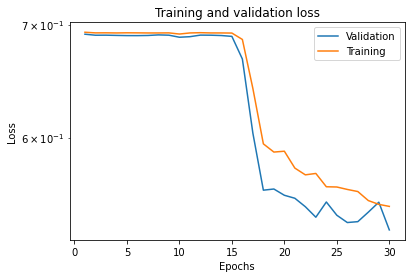

---------------------------------
20 neurons and 25 layers
---------------------------------
Epoch 1/30
136/136 [==============================] - 2s 5ms/step - loss: 0.6927 - accuracy: 0.5211 - val_loss: 0.6910 - val_accuracy: 0.5485
Epoch 2/30
136/136 [==============================] - 1s 4ms/step - loss: 0.6864 - accuracy: 0.5240 - val_loss: 0.6676 - val_accuracy: 0.5485
Epoch 3/30
136/136 [==============================] - 0s 3ms/step - loss: 0.6735 - accuracy: 0.5515 - val_loss: 0.6948 - val_accuracy: 0.4493
Epoch 4/30
136/136 [==============================] - 1s 4ms/step - loss: 0.6927 - accuracy: 0.5103 - val_loss: 0.6909 - val_accuracy: 0.5485
Epoch 5/30
136/136 [==============================] - 0s 4ms/step - loss: 0.6787 - accuracy: 0.5436 - val_loss: 0.6332 - val_accuracy: 0.6784
Epoch 6/30
136/136 [==============================] - 0s 4ms/step - loss: 0.6494 - accuracy: 0.6402 - val_loss: 0.6697 - val_accuracy: 0.6123
Epoch 7/30
136/136 [==============================] - 1

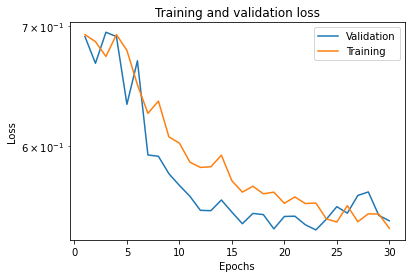

---------------------------------
30 neurons and 5 layers
---------------------------------
Epoch 1/30
136/136 [==============================] - 1s 4ms/step - loss: 0.6765 - accuracy: 0.5760 - val_loss: 0.6515 - val_accuracy: 0.6167
Epoch 2/30
136/136 [==============================] - 0s 3ms/step - loss: 0.6384 - accuracy: 0.6350 - val_loss: 0.6023 - val_accuracy: 0.6740
Epoch 3/30
136/136 [==============================] - 0s 3ms/step - loss: 0.5994 - accuracy: 0.6863 - val_loss: 0.5725 - val_accuracy: 0.6806
Epoch 4/30
136/136 [==============================] - 0s 3ms/step - loss: 0.5896 - accuracy: 0.6907 - val_loss: 0.5689 - val_accuracy: 0.6982
Epoch 5/30
136/136 [==============================] - 0s 2ms/step - loss: 0.5869 - accuracy: 0.6931 - val_loss: 0.5541 - val_accuracy: 0.7026
Epoch 6/30
136/136 [==============================] - 0s 3ms/step - loss: 0.5750 - accuracy: 0.7044 - val_loss: 0.5481 - val_accuracy: 0.7115
Epoch 7/30
136/136 [==============================] - 0s

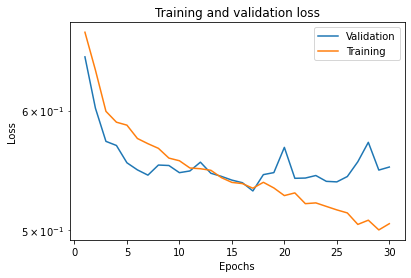

---------------------------------
30 neurons and 10 layers
---------------------------------
Epoch 1/30
136/136 [==============================] - 1s 5ms/step - loss: 0.6885 - accuracy: 0.5373 - val_loss: 0.6567 - val_accuracy: 0.6564
Epoch 2/30
136/136 [==============================] - 0s 3ms/step - loss: 0.6349 - accuracy: 0.6439 - val_loss: 0.6245 - val_accuracy: 0.6630
Epoch 3/30
136/136 [==============================] - 0s 3ms/step - loss: 0.6038 - accuracy: 0.6713 - val_loss: 0.5687 - val_accuracy: 0.6806
Epoch 4/30
136/136 [==============================] - 0s 3ms/step - loss: 0.5922 - accuracy: 0.6858 - val_loss: 0.5619 - val_accuracy: 0.6872
Epoch 5/30
136/136 [==============================] - 0s 3ms/step - loss: 0.5808 - accuracy: 0.6922 - val_loss: 0.5495 - val_accuracy: 0.7115
Epoch 6/30
136/136 [==============================] - 0s 3ms/step - loss: 0.5759 - accuracy: 0.6990 - val_loss: 0.5544 - val_accuracy: 0.7026
Epoch 7/30
136/136 [==============================] - 1

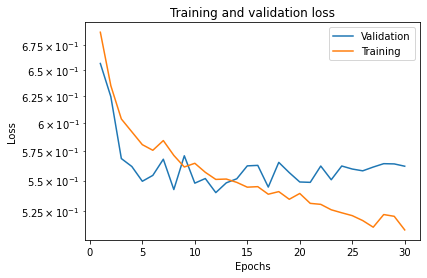

---------------------------------
30 neurons and 15 layers
---------------------------------
Epoch 1/30
136/136 [==============================] - 1s 5ms/step - loss: 0.6835 - accuracy: 0.5461 - val_loss: 0.6277 - val_accuracy: 0.6762
Epoch 2/30
136/136 [==============================] - 0s 3ms/step - loss: 0.6541 - accuracy: 0.6127 - val_loss: 0.6250 - val_accuracy: 0.6740
Epoch 3/30
136/136 [==============================] - 0s 4ms/step - loss: 0.6172 - accuracy: 0.6667 - val_loss: 0.6317 - val_accuracy: 0.6476
Epoch 4/30
136/136 [==============================] - 0s 4ms/step - loss: 0.6076 - accuracy: 0.6779 - val_loss: 0.5679 - val_accuracy: 0.7026
Epoch 5/30
136/136 [==============================] - 1s 4ms/step - loss: 0.5796 - accuracy: 0.7032 - val_loss: 0.5680 - val_accuracy: 0.6938
Epoch 6/30
136/136 [==============================] - 1s 4ms/step - loss: 0.5761 - accuracy: 0.7066 - val_loss: 0.5397 - val_accuracy: 0.7357
Epoch 7/30
136/136 [==============================] - 1

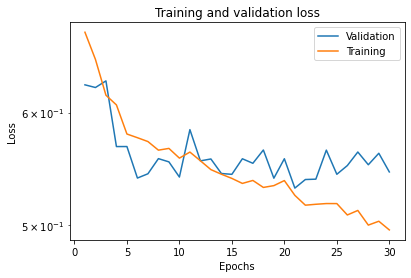

---------------------------------
30 neurons and 20 layers
---------------------------------
Epoch 1/30
136/136 [==============================] - 1s 5ms/step - loss: 0.6922 - accuracy: 0.5240 - val_loss: 0.6900 - val_accuracy: 0.5485
Epoch 2/30
136/136 [==============================] - 1s 4ms/step - loss: 0.6776 - accuracy: 0.5598 - val_loss: 0.6794 - val_accuracy: 0.5903
Epoch 3/30
136/136 [==============================] - 1s 4ms/step - loss: 0.6466 - accuracy: 0.6368 - val_loss: 0.6551 - val_accuracy: 0.6256
Epoch 4/30
136/136 [==============================] - 1s 4ms/step - loss: 0.6217 - accuracy: 0.6598 - val_loss: 0.6000 - val_accuracy: 0.6872
Epoch 5/30
136/136 [==============================] - 1s 4ms/step - loss: 0.6020 - accuracy: 0.6770 - val_loss: 0.5805 - val_accuracy: 0.6982
Epoch 6/30
136/136 [==============================] - 1s 4ms/step - loss: 0.5855 - accuracy: 0.6931 - val_loss: 0.5633 - val_accuracy: 0.7181
Epoch 7/30
136/136 [==============================] - 1

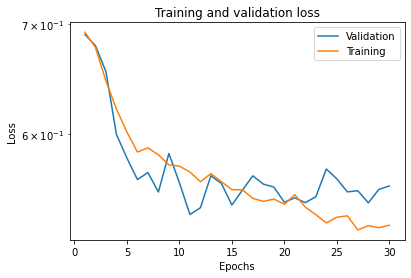

---------------------------------
30 neurons and 25 layers
---------------------------------
Epoch 1/30
136/136 [==============================] - 2s 9ms/step - loss: 0.6912 - accuracy: 0.5240 - val_loss: 0.6733 - val_accuracy: 0.5485
Epoch 2/30
136/136 [==============================] - 1s 4ms/step - loss: 0.6926 - accuracy: 0.5174 - val_loss: 0.6909 - val_accuracy: 0.5485
Epoch 3/30
136/136 [==============================] - 1s 4ms/step - loss: 0.6923 - accuracy: 0.5240 - val_loss: 0.6901 - val_accuracy: 0.5485
Epoch 4/30
136/136 [==============================] - 1s 5ms/step - loss: 0.6921 - accuracy: 0.5240 - val_loss: 0.6897 - val_accuracy: 0.5485
Epoch 5/30
136/136 [==============================] - 1s 5ms/step - loss: 0.6921 - accuracy: 0.5240 - val_loss: 0.6895 - val_accuracy: 0.5485
Epoch 6/30
136/136 [==============================] - 1s 5ms/step - loss: 0.6921 - accuracy: 0.5240 - val_loss: 0.6895 - val_accuracy: 0.5485
Epoch 7/30
136/136 [==============================] - 1

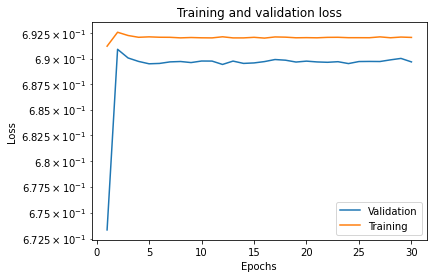

---------------------------------
40 neurons and 5 layers
---------------------------------
Epoch 1/30
136/136 [==============================] - 1s 3ms/step - loss: 0.6697 - accuracy: 0.5853 - val_loss: 0.6123 - val_accuracy: 0.6652
Epoch 2/30
136/136 [==============================] - 0s 3ms/step - loss: 0.6163 - accuracy: 0.6588 - val_loss: 0.6136 - val_accuracy: 0.6520
Epoch 3/30
136/136 [==============================] - 0s 3ms/step - loss: 0.5949 - accuracy: 0.6843 - val_loss: 0.5785 - val_accuracy: 0.6938
Epoch 4/30
136/136 [==============================] - 0s 3ms/step - loss: 0.5833 - accuracy: 0.6975 - val_loss: 0.5689 - val_accuracy: 0.6850
Epoch 5/30
136/136 [==============================] - 0s 3ms/step - loss: 0.5765 - accuracy: 0.7056 - val_loss: 0.5656 - val_accuracy: 0.7026
Epoch 6/30
136/136 [==============================] - 0s 3ms/step - loss: 0.5708 - accuracy: 0.7056 - val_loss: 0.5435 - val_accuracy: 0.7247
Epoch 7/30
136/136 [==============================] - 0s

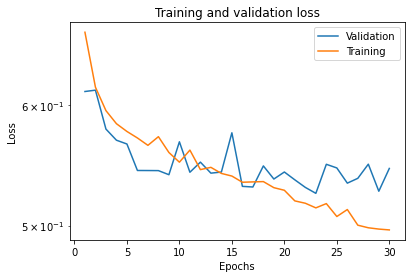

---------------------------------
40 neurons and 10 layers
---------------------------------
Epoch 1/30
136/136 [==============================] - 1s 4ms/step - loss: 0.6886 - accuracy: 0.5255 - val_loss: 0.6961 - val_accuracy: 0.4537
Epoch 2/30
136/136 [==============================] - 0s 3ms/step - loss: 0.6608 - accuracy: 0.5941 - val_loss: 0.6419 - val_accuracy: 0.6718
Epoch 3/30
136/136 [==============================] - 0s 3ms/step - loss: 0.6193 - accuracy: 0.6642 - val_loss: 0.5798 - val_accuracy: 0.7004
Epoch 4/30
136/136 [==============================] - 0s 3ms/step - loss: 0.6036 - accuracy: 0.6770 - val_loss: 0.5747 - val_accuracy: 0.6960
Epoch 5/30
136/136 [==============================] - 0s 3ms/step - loss: 0.5913 - accuracy: 0.6850 - val_loss: 0.5541 - val_accuracy: 0.7269
Epoch 6/30
136/136 [==============================] - 0s 3ms/step - loss: 0.5853 - accuracy: 0.7032 - val_loss: 0.5438 - val_accuracy: 0.7247
Epoch 7/30
136/136 [==============================] - 0

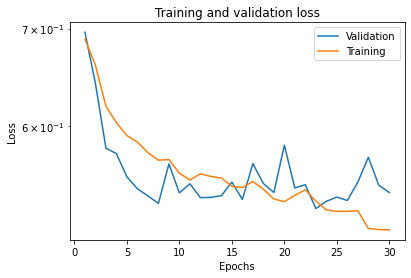

---------------------------------
40 neurons and 15 layers
---------------------------------
Epoch 1/30
136/136 [==============================] - 1s 5ms/step - loss: 0.6920 - accuracy: 0.5233 - val_loss: 0.6915 - val_accuracy: 0.5485
Epoch 2/30
136/136 [==============================] - 0s 4ms/step - loss: 0.6910 - accuracy: 0.5203 - val_loss: 0.6890 - val_accuracy: 0.5485
Epoch 3/30
136/136 [==============================] - 0s 4ms/step - loss: 0.6894 - accuracy: 0.5240 - val_loss: 0.6689 - val_accuracy: 0.5485
Epoch 4/30
136/136 [==============================] - 0s 3ms/step - loss: 0.6810 - accuracy: 0.5471 - val_loss: 0.6642 - val_accuracy: 0.5859
Epoch 5/30
136/136 [==============================] - 0s 4ms/step - loss: 0.6302 - accuracy: 0.6368 - val_loss: 0.5904 - val_accuracy: 0.6828
Epoch 6/30
136/136 [==============================] - 0s 4ms/step - loss: 0.6166 - accuracy: 0.6564 - val_loss: 0.6378 - val_accuracy: 0.6145
Epoch 7/30
136/136 [==============================] - 1

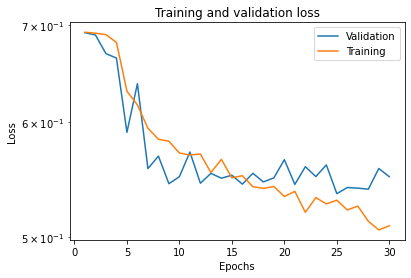

---------------------------------
40 neurons and 20 layers
---------------------------------
Epoch 1/30
136/136 [==============================] - 2s 6ms/step - loss: 0.6921 - accuracy: 0.5233 - val_loss: 0.6901 - val_accuracy: 0.5485
Epoch 2/30
136/136 [==============================] - 1s 4ms/step - loss: 0.6908 - accuracy: 0.5174 - val_loss: 0.6899 - val_accuracy: 0.5485
Epoch 3/30
136/136 [==============================] - 1s 4ms/step - loss: 0.6920 - accuracy: 0.5257 - val_loss: 0.6851 - val_accuracy: 0.6233
Epoch 4/30
136/136 [==============================] - 1s 4ms/step - loss: 0.6762 - accuracy: 0.5618 - val_loss: 0.6924 - val_accuracy: 0.5485
Epoch 5/30
136/136 [==============================] - 1s 4ms/step - loss: 0.6923 - accuracy: 0.5240 - val_loss: 0.6888 - val_accuracy: 0.5485
Epoch 6/30
136/136 [==============================] - 1s 4ms/step - loss: 0.6580 - accuracy: 0.5988 - val_loss: 0.5848 - val_accuracy: 0.6916
Epoch 7/30
136/136 [==============================] - 1

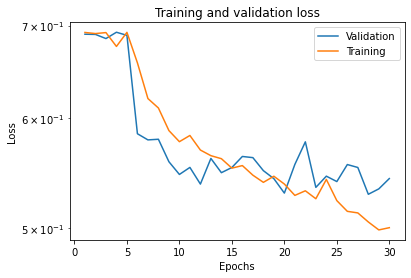

---------------------------------
40 neurons and 25 layers
---------------------------------
Epoch 1/30
136/136 [==============================] - 2s 6ms/step - loss: 0.6926 - accuracy: 0.5216 - val_loss: 0.6905 - val_accuracy: 0.5485
Epoch 2/30
136/136 [==============================] - 1s 5ms/step - loss: 0.6923 - accuracy: 0.5240 - val_loss: 0.6900 - val_accuracy: 0.5485
Epoch 3/30
136/136 [==============================] - 1s 5ms/step - loss: 0.6921 - accuracy: 0.5240 - val_loss: 0.6893 - val_accuracy: 0.5485
Epoch 4/30
136/136 [==============================] - 1s 5ms/step - loss: 0.6923 - accuracy: 0.5240 - val_loss: 0.6895 - val_accuracy: 0.5485
Epoch 5/30
136/136 [==============================] - 1s 5ms/step - loss: 0.6922 - accuracy: 0.5240 - val_loss: 0.6904 - val_accuracy: 0.5485
Epoch 6/30
136/136 [==============================] - 1s 5ms/step - loss: 0.6923 - accuracy: 0.5240 - val_loss: 0.6914 - val_accuracy: 0.5485
Epoch 7/30
136/136 [==============================] - 1

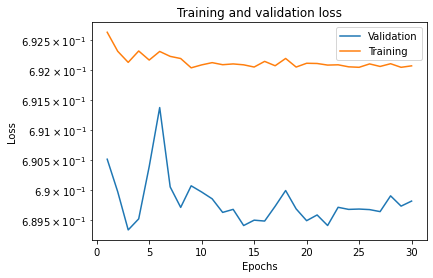

In [23]:
#Layers y units de la red neuronal
op_neurons = list(range(10, 50 , 10))
op_layers = list(range(5,30,5))

model_layers_neurons = []

for neuron in op_neurons:
    for layer in op_layers:
    
        print('---------------------------------')
        print(f'{neuron} neurons and {layer} layers')
        print('---------------------------------')

        model = create_model(neurons = neuron, layers = layer, optimizer = 'Adam', activation = 'relu')
        plot_metric(model.history, 'loss')
        model_layers_neurons.append((neuron, layer, max(model.history.history['val_accuracy'])))

In [24]:
model_layers_neurons

[(10, 5, 0.7202643156051636),
 (10, 10, 0.7224669456481934),
 (10, 15, 0.7290748953819275),
 (10, 20, 0.5484581589698792),
 (10, 25, 0.7224669456481934),
 (20, 5, 0.7378854751586914),
 (20, 10, 0.7511013150215149),
 (20, 15, 0.742290735244751),
 (20, 20, 0.7400881052017212),
 (20, 25, 0.715859055519104),
 (30, 5, 0.7356828451156616),
 (30, 10, 0.7268722653388977),
 (30, 15, 0.742290735244751),
 (30, 20, 0.7378854751586914),
 (30, 25, 0.5484581589698792),
 (40, 5, 0.7444933652877808),
 (40, 10, 0.742290735244751),
 (40, 15, 0.7378854751586914),
 (40, 20, 0.742290735244751),
 (40, 25, 0.5484581589698792)]

## Dos candidatos:

* 10 neuronas y 5 capas internas
* 50 neuronas y 20 capas internas 

**Usare 10,5 por ser mas simple**

---------------------------------
50 batch size and 0.0005 learning rate
---------------------------------
Epoch 1/30
82/82 [==============================] - 1s 5ms/step - loss: 0.6915 - accuracy: 0.5341 - val_loss: 0.6878 - val_accuracy: 0.5529
Epoch 2/30
82/82 [==============================] - 0s 3ms/step - loss: 0.6894 - accuracy: 0.5417 - val_loss: 0.6807 - val_accuracy: 0.5529
Epoch 3/30
82/82 [==============================] - 0s 3ms/step - loss: 0.6825 - accuracy: 0.5471 - val_loss: 0.6709 - val_accuracy: 0.6300
Epoch 4/30
82/82 [==============================] - 0s 3ms/step - loss: 0.6728 - accuracy: 0.5895 - val_loss: 0.6559 - val_accuracy: 0.6586
Epoch 5/30
82/82 [==============================] - 0s 3ms/step - loss: 0.6591 - accuracy: 0.6225 - val_loss: 0.6402 - val_accuracy: 0.6718
Epoch 6/30
82/82 [==============================] - 0s 3ms/step - loss: 0.6435 - accuracy: 0.6360 - val_loss: 0.6282 - val_accuracy: 0.6696
Epoch 7/30
82/82 [==============================] - 0

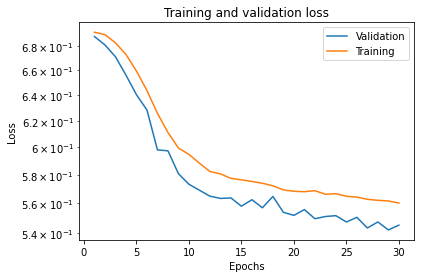

---------------------------------
50 batch size and 0.001 learning rate
---------------------------------
Epoch 1/30
82/82 [==============================] - 1s 5ms/step - loss: 0.6930 - accuracy: 0.5240 - val_loss: 0.6893 - val_accuracy: 0.5485
Epoch 2/30
82/82 [==============================] - 0s 4ms/step - loss: 0.6916 - accuracy: 0.5240 - val_loss: 0.6876 - val_accuracy: 0.5485
Epoch 3/30
82/82 [==============================] - 0s 4ms/step - loss: 0.6893 - accuracy: 0.5265 - val_loss: 0.6829 - val_accuracy: 0.5639
Epoch 4/30
82/82 [==============================] - 0s 5ms/step - loss: 0.6815 - accuracy: 0.5583 - val_loss: 0.6672 - val_accuracy: 0.6256
Epoch 5/30
82/82 [==============================] - 0s 4ms/step - loss: 0.6638 - accuracy: 0.6091 - val_loss: 0.6459 - val_accuracy: 0.6454
Epoch 6/30
82/82 [==============================] - 0s 3ms/step - loss: 0.6452 - accuracy: 0.6449 - val_loss: 0.6234 - val_accuracy: 0.6828
Epoch 7/30
82/82 [==============================] - 0s

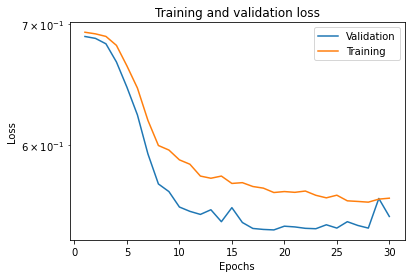

---------------------------------
50 batch size and 0.0015 learning rate
---------------------------------
Epoch 1/30
82/82 [==============================] - 1s 5ms/step - loss: 0.6908 - accuracy: 0.5233 - val_loss: 0.6819 - val_accuracy: 0.5529
Epoch 2/30
82/82 [==============================] - 0s 3ms/step - loss: 0.6743 - accuracy: 0.5892 - val_loss: 0.6284 - val_accuracy: 0.6960
Epoch 3/30
82/82 [==============================] - 0s 4ms/step - loss: 0.6236 - accuracy: 0.6505 - val_loss: 0.5850 - val_accuracy: 0.7004
Epoch 4/30
82/82 [==============================] - 0s 4ms/step - loss: 0.6002 - accuracy: 0.6843 - val_loss: 0.5735 - val_accuracy: 0.6916
Epoch 5/30
82/82 [==============================] - 0s 4ms/step - loss: 0.5962 - accuracy: 0.6799 - val_loss: 0.5745 - val_accuracy: 0.6916
Epoch 6/30
82/82 [==============================] - 0s 3ms/step - loss: 0.5895 - accuracy: 0.6877 - val_loss: 0.5667 - val_accuracy: 0.6850
Epoch 7/30
82/82 [==============================] - 0

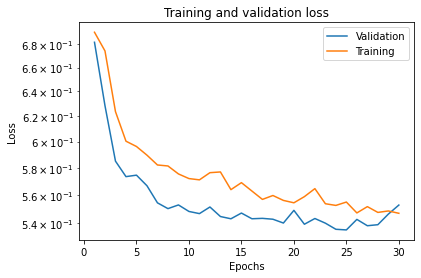

---------------------------------
50 batch size and 0.002 learning rate
---------------------------------
Epoch 1/30
82/82 [==============================] - 1s 5ms/step - loss: 0.6845 - accuracy: 0.5542 - val_loss: 0.6626 - val_accuracy: 0.6740
Epoch 2/30
82/82 [==============================] - 0s 3ms/step - loss: 0.6398 - accuracy: 0.6414 - val_loss: 0.5898 - val_accuracy: 0.6916
Epoch 3/30
82/82 [==============================] - 0s 3ms/step - loss: 0.6032 - accuracy: 0.6828 - val_loss: 0.5727 - val_accuracy: 0.6806
Epoch 4/30
82/82 [==============================] - 0s 3ms/step - loss: 0.5916 - accuracy: 0.6870 - val_loss: 0.5613 - val_accuracy: 0.7048
Epoch 5/30
82/82 [==============================] - 0s 3ms/step - loss: 0.5853 - accuracy: 0.6958 - val_loss: 0.5567 - val_accuracy: 0.6916
Epoch 6/30
82/82 [==============================] - 0s 3ms/step - loss: 0.5784 - accuracy: 0.7012 - val_loss: 0.5949 - val_accuracy: 0.6806
Epoch 7/30
82/82 [==============================] - 0s

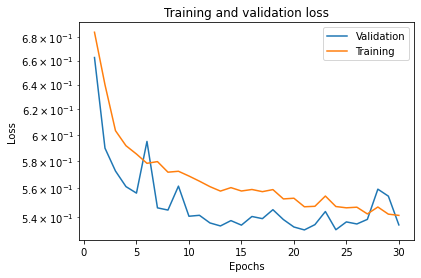

---------------------------------
50 batch size and 0.0025 learning rate
---------------------------------
Epoch 1/30
82/82 [==============================] - 1s 7ms/step - loss: 0.6898 - accuracy: 0.5284 - val_loss: 0.6810 - val_accuracy: 0.6167
Epoch 2/30
82/82 [==============================] - 0s 3ms/step - loss: 0.6562 - accuracy: 0.6221 - val_loss: 0.6053 - val_accuracy: 0.6718
Epoch 3/30
82/82 [==============================] - 0s 3ms/step - loss: 0.6041 - accuracy: 0.6708 - val_loss: 0.5592 - val_accuracy: 0.6960
Epoch 4/30
82/82 [==============================] - 0s 3ms/step - loss: 0.5962 - accuracy: 0.6814 - val_loss: 0.6015 - val_accuracy: 0.6696
Epoch 5/30
82/82 [==============================] - 0s 3ms/step - loss: 0.5874 - accuracy: 0.6934 - val_loss: 0.5642 - val_accuracy: 0.6982
Epoch 6/30
82/82 [==============================] - 0s 4ms/step - loss: 0.5817 - accuracy: 0.6990 - val_loss: 0.5661 - val_accuracy: 0.6982
Epoch 7/30
82/82 [==============================] - 0

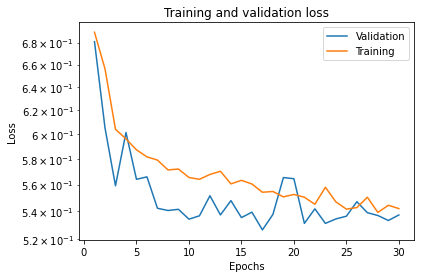

---------------------------------
100 batch size and 0.0005 learning rate
---------------------------------
Epoch 1/30
41/41 [==============================] - 1s 5ms/step - loss: 0.6932 - accuracy: 0.5088 - val_loss: 0.6919 - val_accuracy: 0.5573
Epoch 2/30
41/41 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5493 - val_loss: 0.6900 - val_accuracy: 0.5617
Epoch 3/30
41/41 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.5564 - val_loss: 0.6882 - val_accuracy: 0.5727
Epoch 4/30
41/41 [==============================] - 0s 4ms/step - loss: 0.6860 - accuracy: 0.5748 - val_loss: 0.6833 - val_accuracy: 0.5881
Epoch 5/30
41/41 [==============================] - 0s 5ms/step - loss: 0.6800 - accuracy: 0.5882 - val_loss: 0.6765 - val_accuracy: 0.6013
Epoch 6/30
41/41 [==============================] - 0s 5ms/step - loss: 0.6707 - accuracy: 0.6091 - val_loss: 0.6644 - val_accuracy: 0.6123
Epoch 7/30
41/41 [==============================] - 

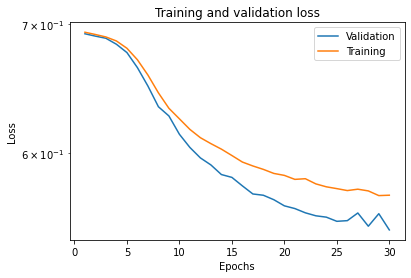

---------------------------------
100 batch size and 0.001 learning rate
---------------------------------
Epoch 1/30
41/41 [==============================] - 1s 9ms/step - loss: 0.6942 - accuracy: 0.5047 - val_loss: 0.6919 - val_accuracy: 0.5793
Epoch 2/30
41/41 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5392 - val_loss: 0.6885 - val_accuracy: 0.5793
Epoch 3/30
41/41 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5547 - val_loss: 0.6826 - val_accuracy: 0.6167
Epoch 4/30
41/41 [==============================] - 0s 3ms/step - loss: 0.6828 - accuracy: 0.5826 - val_loss: 0.6726 - val_accuracy: 0.6256
Epoch 5/30
41/41 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.6172 - val_loss: 0.6508 - val_accuracy: 0.6476
Epoch 6/30
41/41 [==============================] - 0s 2ms/step - loss: 0.6502 - accuracy: 0.6355 - val_loss: 0.6260 - val_accuracy: 0.6564
Epoch 7/30
41/41 [==============================] - 0

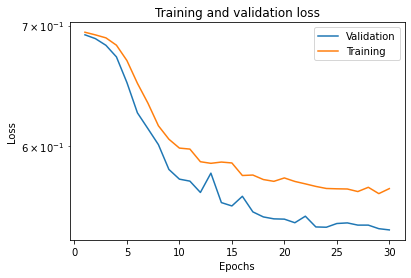

---------------------------------
100 batch size and 0.0015 learning rate
---------------------------------
Epoch 1/30
41/41 [==============================] - 1s 6ms/step - loss: 0.6932 - accuracy: 0.5206 - val_loss: 0.6909 - val_accuracy: 0.5903
Epoch 2/30
41/41 [==============================] - 0s 5ms/step - loss: 0.6906 - accuracy: 0.5554 - val_loss: 0.6864 - val_accuracy: 0.5991
Epoch 3/30
41/41 [==============================] - 0s 4ms/step - loss: 0.6838 - accuracy: 0.5799 - val_loss: 0.6788 - val_accuracy: 0.5639
Epoch 4/30
41/41 [==============================] - 0s 2ms/step - loss: 0.6635 - accuracy: 0.6223 - val_loss: 0.6400 - val_accuracy: 0.6740
Epoch 5/30
41/41 [==============================] - 0s 2ms/step - loss: 0.6215 - accuracy: 0.6647 - val_loss: 0.5991 - val_accuracy: 0.6916
Epoch 6/30
41/41 [==============================] - 0s 3ms/step - loss: 0.5973 - accuracy: 0.6816 - val_loss: 0.5788 - val_accuracy: 0.6872
Epoch 7/30
41/41 [==============================] - 

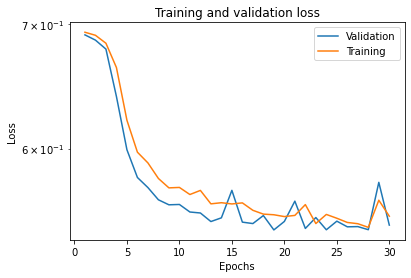

---------------------------------
100 batch size and 0.002 learning rate
---------------------------------
Epoch 1/30
41/41 [==============================] - 1s 5ms/step - loss: 0.6912 - accuracy: 0.5230 - val_loss: 0.6849 - val_accuracy: 0.5485
Epoch 2/30
41/41 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.5270 - val_loss: 0.6672 - val_accuracy: 0.6322
Epoch 3/30
41/41 [==============================] - 0s 2ms/step - loss: 0.6536 - accuracy: 0.6343 - val_loss: 0.6326 - val_accuracy: 0.6586
Epoch 4/30
41/41 [==============================] - 0s 2ms/step - loss: 0.6222 - accuracy: 0.6725 - val_loss: 0.6087 - val_accuracy: 0.6652
Epoch 5/30
41/41 [==============================] - 0s 2ms/step - loss: 0.6086 - accuracy: 0.6868 - val_loss: 0.6055 - val_accuracy: 0.6696
Epoch 6/30
41/41 [==============================] - 0s 2ms/step - loss: 0.6020 - accuracy: 0.6877 - val_loss: 0.5808 - val_accuracy: 0.6938
Epoch 7/30
41/41 [==============================] - 0

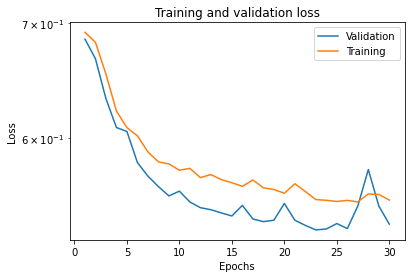

---------------------------------
100 batch size and 0.0025 learning rate
---------------------------------
Epoch 1/30
41/41 [==============================] - 1s 5ms/step - loss: 0.6883 - accuracy: 0.5745 - val_loss: 0.6769 - val_accuracy: 0.6167
Epoch 2/30
41/41 [==============================] - 0s 2ms/step - loss: 0.6607 - accuracy: 0.6248 - val_loss: 0.6538 - val_accuracy: 0.5969
Epoch 3/30
41/41 [==============================] - 0s 4ms/step - loss: 0.6305 - accuracy: 0.6453 - val_loss: 0.6073 - val_accuracy: 0.6960
Epoch 4/30
41/41 [==============================] - 0s 3ms/step - loss: 0.6026 - accuracy: 0.6836 - val_loss: 0.6028 - val_accuracy: 0.6542
Epoch 5/30
41/41 [==============================] - 0s 3ms/step - loss: 0.5966 - accuracy: 0.6806 - val_loss: 0.5839 - val_accuracy: 0.7026
Epoch 6/30
41/41 [==============================] - 0s 2ms/step - loss: 0.5869 - accuracy: 0.6914 - val_loss: 0.5633 - val_accuracy: 0.7093
Epoch 7/30
41/41 [==============================] - 

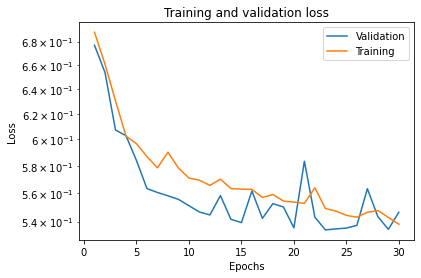

---------------------------------
150 batch size and 0.0005 learning rate
---------------------------------
Epoch 1/30
28/28 [==============================] - 1s 6ms/step - loss: 0.6937 - accuracy: 0.5164 - val_loss: 0.6905 - val_accuracy: 0.5352
Epoch 2/30
28/28 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5510 - val_loss: 0.6870 - val_accuracy: 0.5749
Epoch 3/30
28/28 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5686 - val_loss: 0.6845 - val_accuracy: 0.5815
Epoch 4/30
28/28 [==============================] - 0s 2ms/step - loss: 0.6846 - accuracy: 0.5642 - val_loss: 0.6818 - val_accuracy: 0.5903
Epoch 5/30
28/28 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.5961 - val_loss: 0.6774 - val_accuracy: 0.6256
Epoch 6/30
28/28 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.6159 - val_loss: 0.6691 - val_accuracy: 0.6145
Epoch 7/30
28/28 [==============================] - 

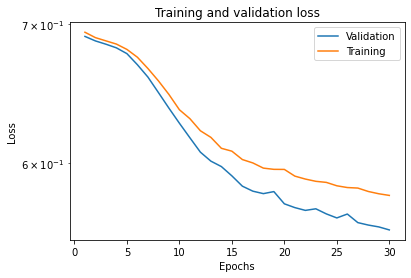

---------------------------------
150 batch size and 0.001 learning rate
---------------------------------
Epoch 1/30
28/28 [==============================] - 1s 6ms/step - loss: 0.6939 - accuracy: 0.5203 - val_loss: 0.6904 - val_accuracy: 0.5551
Epoch 2/30
28/28 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5255 - val_loss: 0.6876 - val_accuracy: 0.5507
Epoch 3/30
28/28 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5326 - val_loss: 0.6846 - val_accuracy: 0.5573
Epoch 4/30
28/28 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.5566 - val_loss: 0.6789 - val_accuracy: 0.6366
Epoch 5/30
28/28 [==============================] - 0s 3ms/step - loss: 0.6752 - accuracy: 0.6081 - val_loss: 0.6634 - val_accuracy: 0.6344
Epoch 6/30
28/28 [==============================] - 0s 3ms/step - loss: 0.6572 - accuracy: 0.6395 - val_loss: 0.6476 - val_accuracy: 0.6542
Epoch 7/30
28/28 [==============================] - 0

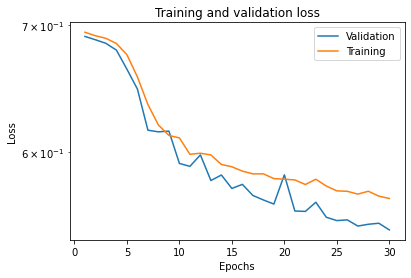

---------------------------------
150 batch size and 0.0015 learning rate
---------------------------------
Epoch 1/30
28/28 [==============================] - 1s 7ms/step - loss: 0.6931 - accuracy: 0.5174 - val_loss: 0.6903 - val_accuracy: 0.5573
Epoch 2/30
28/28 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5468 - val_loss: 0.6847 - val_accuracy: 0.5771
Epoch 3/30
28/28 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5772 - val_loss: 0.6685 - val_accuracy: 0.6101
Epoch 4/30
28/28 [==============================] - 0s 2ms/step - loss: 0.6647 - accuracy: 0.6157 - val_loss: 0.6398 - val_accuracy: 0.6630
Epoch 5/30
28/28 [==============================] - 0s 3ms/step - loss: 0.6373 - accuracy: 0.6483 - val_loss: 0.6055 - val_accuracy: 0.6916
Epoch 6/30
28/28 [==============================] - 0s 3ms/step - loss: 0.6175 - accuracy: 0.6625 - val_loss: 0.5912 - val_accuracy: 0.6894
Epoch 7/30
28/28 [==============================] - 

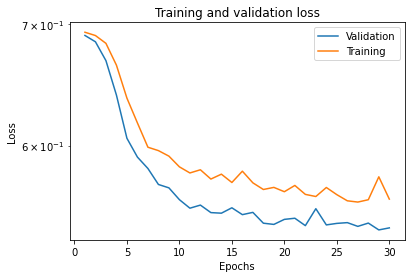

---------------------------------
150 batch size and 0.002 learning rate
---------------------------------
Epoch 1/30
28/28 [==============================] - 1s 7ms/step - loss: 0.6903 - accuracy: 0.5574 - val_loss: 0.6873 - val_accuracy: 0.5947
Epoch 2/30
28/28 [==============================] - 0s 4ms/step - loss: 0.6798 - accuracy: 0.6044 - val_loss: 0.6684 - val_accuracy: 0.6476
Epoch 3/30
28/28 [==============================] - 0s 3ms/step - loss: 0.6558 - accuracy: 0.6493 - val_loss: 0.6363 - val_accuracy: 0.6762
Epoch 4/30
28/28 [==============================] - 0s 2ms/step - loss: 0.6231 - accuracy: 0.6642 - val_loss: 0.6199 - val_accuracy: 0.6300
Epoch 5/30
28/28 [==============================] - 0s 2ms/step - loss: 0.6066 - accuracy: 0.6846 - val_loss: 0.5813 - val_accuracy: 0.6850
Epoch 6/30
28/28 [==============================] - 0s 2ms/step - loss: 0.5907 - accuracy: 0.6968 - val_loss: 0.5679 - val_accuracy: 0.6916
Epoch 7/30
28/28 [==============================] - 0

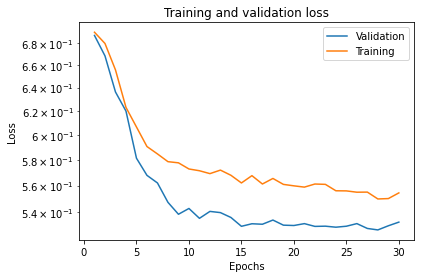

---------------------------------
150 batch size and 0.0025 learning rate
---------------------------------
Epoch 1/30
28/28 [==============================] - 1s 8ms/step - loss: 0.6923 - accuracy: 0.5235 - val_loss: 0.6913 - val_accuracy: 0.5264
Epoch 2/30
28/28 [==============================] - 0s 3ms/step - loss: 0.6894 - accuracy: 0.5431 - val_loss: 0.6880 - val_accuracy: 0.5485
Epoch 3/30
28/28 [==============================] - 0s 3ms/step - loss: 0.6788 - accuracy: 0.5770 - val_loss: 0.6672 - val_accuracy: 0.6344
Epoch 4/30
28/28 [==============================] - 0s 3ms/step - loss: 0.6482 - accuracy: 0.6336 - val_loss: 0.6209 - val_accuracy: 0.6718
Epoch 5/30
28/28 [==============================] - 0s 2ms/step - loss: 0.6181 - accuracy: 0.6600 - val_loss: 0.6196 - val_accuracy: 0.6498
Epoch 6/30
28/28 [==============================] - 0s 3ms/step - loss: 0.5979 - accuracy: 0.6816 - val_loss: 0.5834 - val_accuracy: 0.6938
Epoch 7/30
28/28 [==============================] - 

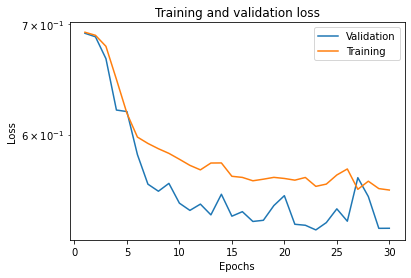

---------------------------------
200 batch size and 0.0005 learning rate
---------------------------------
Epoch 1/30
21/21 [==============================] - 1s 9ms/step - loss: 0.6933 - accuracy: 0.5181 - val_loss: 0.6881 - val_accuracy: 0.5485
Epoch 2/30
21/21 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.5240 - val_loss: 0.6859 - val_accuracy: 0.5485
Epoch 3/30
21/21 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.5240 - val_loss: 0.6836 - val_accuracy: 0.5485
Epoch 4/30
21/21 [==============================] - 0s 3ms/step - loss: 0.6882 - accuracy: 0.5240 - val_loss: 0.6801 - val_accuracy: 0.5485
Epoch 5/30
21/21 [==============================] - 0s 3ms/step - loss: 0.6865 - accuracy: 0.5240 - val_loss: 0.6773 - val_accuracy: 0.5485
Epoch 6/30
21/21 [==============================] - 0s 3ms/step - loss: 0.6841 - accuracy: 0.5240 - val_loss: 0.6735 - val_accuracy: 0.5485
Epoch 7/30
21/21 [==============================] - 

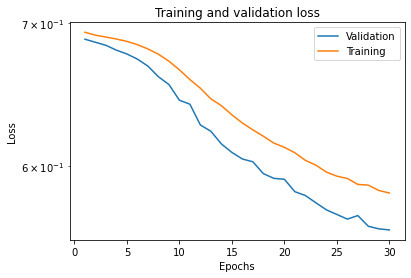

---------------------------------
200 batch size and 0.001 learning rate
---------------------------------
Epoch 1/30
21/21 [==============================] - 1s 8ms/step - loss: 0.6926 - accuracy: 0.5172 - val_loss: 0.6894 - val_accuracy: 0.5485
Epoch 2/30
21/21 [==============================] - 0s 3ms/step - loss: 0.6908 - accuracy: 0.5240 - val_loss: 0.6869 - val_accuracy: 0.5485
Epoch 3/30
21/21 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5240 - val_loss: 0.6836 - val_accuracy: 0.5485
Epoch 4/30
21/21 [==============================] - 0s 3ms/step - loss: 0.6858 - accuracy: 0.5257 - val_loss: 0.6780 - val_accuracy: 0.5573
Epoch 5/30
21/21 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.5532 - val_loss: 0.6690 - val_accuracy: 0.6101
Epoch 6/30
21/21 [==============================] - 0s 3ms/step - loss: 0.6686 - accuracy: 0.5993 - val_loss: 0.6497 - val_accuracy: 0.6542
Epoch 7/30
21/21 [==============================] - 0

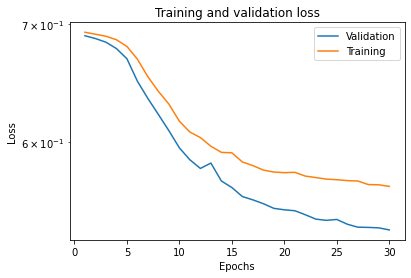

---------------------------------
200 batch size and 0.0015 learning rate
---------------------------------
Epoch 1/30
21/21 [==============================] - 1s 7ms/step - loss: 0.6923 - accuracy: 0.5240 - val_loss: 0.6895 - val_accuracy: 0.5485
Epoch 2/30
21/21 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5240 - val_loss: 0.6840 - val_accuracy: 0.5485
Epoch 3/30
21/21 [==============================] - 0s 3ms/step - loss: 0.6859 - accuracy: 0.5240 - val_loss: 0.6745 - val_accuracy: 0.5485
Epoch 4/30
21/21 [==============================] - 0s 3ms/step - loss: 0.6769 - accuracy: 0.5431 - val_loss: 0.6582 - val_accuracy: 0.5815
Epoch 5/30
21/21 [==============================] - 0s 3ms/step - loss: 0.6607 - accuracy: 0.6071 - val_loss: 0.6379 - val_accuracy: 0.6718
Epoch 6/30
21/21 [==============================] - 0s 2ms/step - loss: 0.6409 - accuracy: 0.6471 - val_loss: 0.6170 - val_accuracy: 0.6784
Epoch 7/30
21/21 [==============================] - 

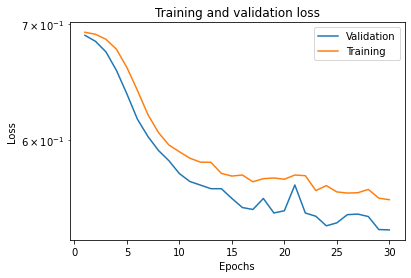

---------------------------------
200 batch size and 0.002 learning rate
---------------------------------
Epoch 1/30
21/21 [==============================] - 1s 7ms/step - loss: 0.6916 - accuracy: 0.5309 - val_loss: 0.6862 - val_accuracy: 0.5771
Epoch 2/30
21/21 [==============================] - 0s 3ms/step - loss: 0.6846 - accuracy: 0.5618 - val_loss: 0.6719 - val_accuracy: 0.6123
Epoch 3/30
21/21 [==============================] - 0s 2ms/step - loss: 0.6693 - accuracy: 0.6059 - val_loss: 0.6455 - val_accuracy: 0.6652
Epoch 4/30
21/21 [==============================] - 0s 2ms/step - loss: 0.6453 - accuracy: 0.6301 - val_loss: 0.6155 - val_accuracy: 0.6828
Epoch 5/30
21/21 [==============================] - 0s 2ms/step - loss: 0.6228 - accuracy: 0.6542 - val_loss: 0.6016 - val_accuracy: 0.6938
Epoch 6/30
21/21 [==============================] - 0s 3ms/step - loss: 0.6065 - accuracy: 0.6728 - val_loss: 0.6065 - val_accuracy: 0.6652
Epoch 7/30
21/21 [==============================] - 0

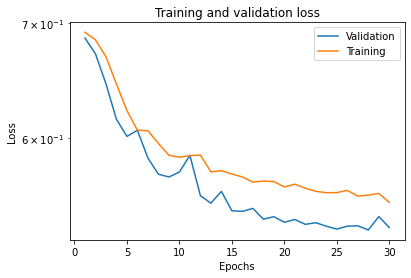

---------------------------------
200 batch size and 0.0025 learning rate
---------------------------------
Epoch 1/30
21/21 [==============================] - 1s 10ms/step - loss: 0.6897 - accuracy: 0.5248 - val_loss: 0.6869 - val_accuracy: 0.5374
Epoch 2/30
21/21 [==============================] - 0s 3ms/step - loss: 0.6839 - accuracy: 0.5708 - val_loss: 0.6754 - val_accuracy: 0.6101
Epoch 3/30
21/21 [==============================] - 0s 3ms/step - loss: 0.6618 - accuracy: 0.6240 - val_loss: 0.6411 - val_accuracy: 0.6498
Epoch 4/30
21/21 [==============================] - 0s 4ms/step - loss: 0.6308 - accuracy: 0.6512 - val_loss: 0.6112 - val_accuracy: 0.6850
Epoch 5/30
21/21 [==============================] - 0s 3ms/step - loss: 0.6084 - accuracy: 0.6654 - val_loss: 0.5930 - val_accuracy: 0.6608
Epoch 6/30
21/21 [==============================] - 0s 3ms/step - loss: 0.5910 - accuracy: 0.6860 - val_loss: 0.5815 - val_accuracy: 0.6806
Epoch 7/30
21/21 [==============================] -

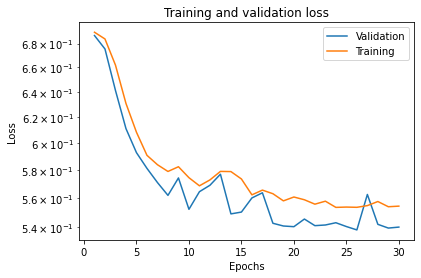

---------------------------------
250 batch size and 0.0005 learning rate
---------------------------------
Epoch 1/30
17/17 [==============================] - 1s 10ms/step - loss: 0.6994 - accuracy: 0.5240 - val_loss: 0.6929 - val_accuracy: 0.5485
Epoch 2/30
17/17 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.5240 - val_loss: 0.6916 - val_accuracy: 0.5485
Epoch 3/30
17/17 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5240 - val_loss: 0.6914 - val_accuracy: 0.5485
Epoch 4/30
17/17 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5240 - val_loss: 0.6914 - val_accuracy: 0.5485
Epoch 5/30
17/17 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5240 - val_loss: 0.6913 - val_accuracy: 0.5485
Epoch 6/30
17/17 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5240 - val_loss: 0.6909 - val_accuracy: 0.5485
Epoch 7/30
17/17 [==============================] -

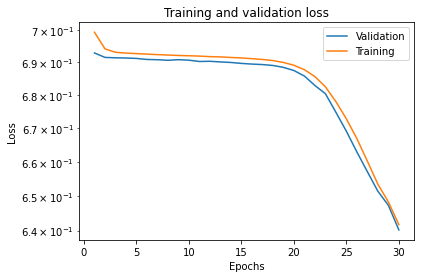

---------------------------------
250 batch size and 0.001 learning rate
---------------------------------
Epoch 1/30
17/17 [==============================] - 1s 9ms/step - loss: 0.6868 - accuracy: 0.5417 - val_loss: 0.6781 - val_accuracy: 0.6322
Epoch 2/30
17/17 [==============================] - 0s 3ms/step - loss: 0.6816 - accuracy: 0.5855 - val_loss: 0.6668 - val_accuracy: 0.6344
Epoch 3/30
17/17 [==============================] - 0s 3ms/step - loss: 0.6734 - accuracy: 0.6025 - val_loss: 0.6538 - val_accuracy: 0.6586
Epoch 4/30
17/17 [==============================] - 0s 4ms/step - loss: 0.6624 - accuracy: 0.6159 - val_loss: 0.6386 - val_accuracy: 0.6564
Epoch 5/30
17/17 [==============================] - 0s 3ms/step - loss: 0.6496 - accuracy: 0.6355 - val_loss: 0.6266 - val_accuracy: 0.6916
Epoch 6/30
17/17 [==============================] - 0s 3ms/step - loss: 0.6357 - accuracy: 0.6549 - val_loss: 0.6076 - val_accuracy: 0.6828
Epoch 7/30
17/17 [==============================] - 0

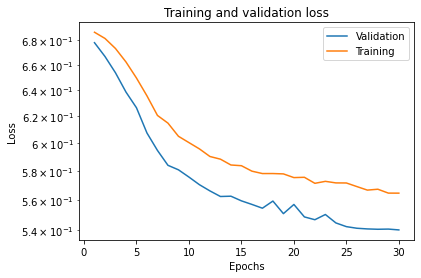

---------------------------------
250 batch size and 0.0015 learning rate
---------------------------------
Epoch 1/30
17/17 [==============================] - 1s 9ms/step - loss: 0.6922 - accuracy: 0.5240 - val_loss: 0.6877 - val_accuracy: 0.5485
Epoch 2/30
17/17 [==============================] - 0s 3ms/step - loss: 0.6885 - accuracy: 0.5245 - val_loss: 0.6809 - val_accuracy: 0.5573
Epoch 3/30
17/17 [==============================] - 0s 3ms/step - loss: 0.6817 - accuracy: 0.5767 - val_loss: 0.6673 - val_accuracy: 0.6233
Epoch 4/30
17/17 [==============================] - 0s 3ms/step - loss: 0.6672 - accuracy: 0.6223 - val_loss: 0.6463 - val_accuracy: 0.6520
Epoch 5/30
17/17 [==============================] - 0s 3ms/step - loss: 0.6516 - accuracy: 0.6404 - val_loss: 0.6250 - val_accuracy: 0.6762
Epoch 6/30
17/17 [==============================] - 0s 3ms/step - loss: 0.6301 - accuracy: 0.6588 - val_loss: 0.6096 - val_accuracy: 0.6784
Epoch 7/30
17/17 [==============================] - 

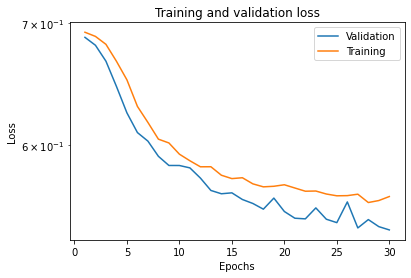

---------------------------------
250 batch size and 0.002 learning rate
---------------------------------
Epoch 1/30
17/17 [==============================] - 1s 9ms/step - loss: 0.6925 - accuracy: 0.5314 - val_loss: 0.6897 - val_accuracy: 0.5661
Epoch 2/30
17/17 [==============================] - 0s 3ms/step - loss: 0.6901 - accuracy: 0.5500 - val_loss: 0.6835 - val_accuracy: 0.5859
Epoch 3/30
17/17 [==============================] - 0s 3ms/step - loss: 0.6815 - accuracy: 0.6037 - val_loss: 0.6674 - val_accuracy: 0.6850
Epoch 4/30
17/17 [==============================] - 0s 3ms/step - loss: 0.6621 - accuracy: 0.6370 - val_loss: 0.6349 - val_accuracy: 0.6894
Epoch 5/30
17/17 [==============================] - 0s 3ms/step - loss: 0.6324 - accuracy: 0.6681 - val_loss: 0.5989 - val_accuracy: 0.7048
Epoch 6/30
17/17 [==============================] - 0s 3ms/step - loss: 0.6108 - accuracy: 0.6743 - val_loss: 0.5790 - val_accuracy: 0.7026
Epoch 7/30
17/17 [==============================] - 0

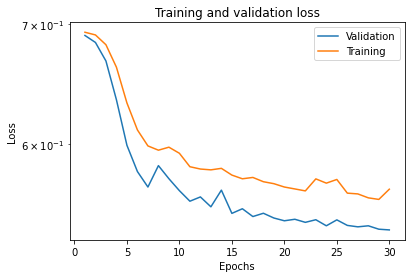

---------------------------------
250 batch size and 0.0025 learning rate
---------------------------------
Epoch 1/30
17/17 [==============================] - 1s 12ms/step - loss: 0.6936 - accuracy: 0.4936 - val_loss: 0.6874 - val_accuracy: 0.5485
Epoch 2/30
17/17 [==============================] - 0s 3ms/step - loss: 0.6887 - accuracy: 0.5240 - val_loss: 0.6800 - val_accuracy: 0.5485
Epoch 3/30
17/17 [==============================] - 0s 3ms/step - loss: 0.6810 - accuracy: 0.5385 - val_loss: 0.6627 - val_accuracy: 0.6057
Epoch 4/30
17/17 [==============================] - 0s 3ms/step - loss: 0.6666 - accuracy: 0.6127 - val_loss: 0.6431 - val_accuracy: 0.6740
Epoch 5/30
17/17 [==============================] - 0s 3ms/step - loss: 0.6400 - accuracy: 0.6569 - val_loss: 0.6036 - val_accuracy: 0.6872
Epoch 6/30
17/17 [==============================] - 0s 3ms/step - loss: 0.6152 - accuracy: 0.6755 - val_loss: 0.5906 - val_accuracy: 0.6850
Epoch 7/30
17/17 [==============================] -

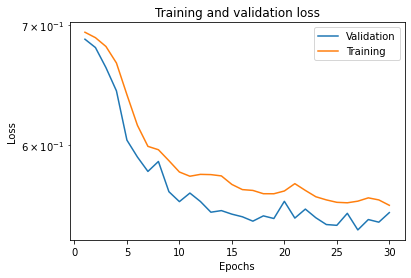

---------------------------------
300 batch size and 0.0005 learning rate
---------------------------------
Epoch 1/30
14/14 [==============================] - 1s 12ms/step - loss: 0.6934 - accuracy: 0.5233 - val_loss: 0.6925 - val_accuracy: 0.5485
Epoch 2/30
14/14 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5262 - val_loss: 0.6915 - val_accuracy: 0.5529
Epoch 3/30
14/14 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5235 - val_loss: 0.6906 - val_accuracy: 0.5463
Epoch 4/30
14/14 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5252 - val_loss: 0.6897 - val_accuracy: 0.5485
Epoch 5/30
14/14 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5245 - val_loss: 0.6883 - val_accuracy: 0.5485
Epoch 6/30
14/14 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.5250 - val_loss: 0.6868 - val_accuracy: 0.5485
Epoch 7/30
14/14 [==============================] -

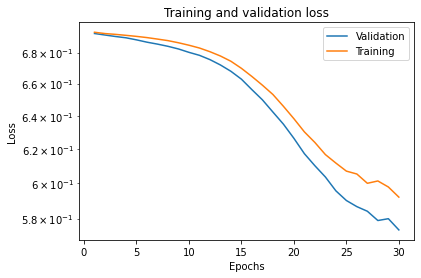

---------------------------------
300 batch size and 0.001 learning rate
---------------------------------
Epoch 1/30
14/14 [==============================] - 1s 11ms/step - loss: 0.6989 - accuracy: 0.4691 - val_loss: 0.6942 - val_accuracy: 0.4670
Epoch 2/30
14/14 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5054 - val_loss: 0.6924 - val_accuracy: 0.5374
Epoch 3/30
14/14 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5228 - val_loss: 0.6915 - val_accuracy: 0.5485
Epoch 4/30
14/14 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5240 - val_loss: 0.6909 - val_accuracy: 0.5485
Epoch 5/30
14/14 [==============================] - 0s 5ms/step - loss: 0.6919 - accuracy: 0.5240 - val_loss: 0.6904 - val_accuracy: 0.5485
Epoch 6/30
14/14 [==============================] - 0s 4ms/step - loss: 0.6917 - accuracy: 0.5240 - val_loss: 0.6901 - val_accuracy: 0.5485
Epoch 7/30
14/14 [==============================] - 

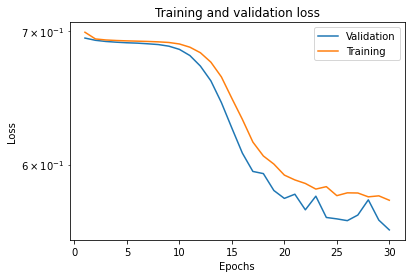

---------------------------------
300 batch size and 0.0015 learning rate
---------------------------------
Epoch 1/30
14/14 [==============================] - 1s 11ms/step - loss: 0.6935 - accuracy: 0.5037 - val_loss: 0.6899 - val_accuracy: 0.5705
Epoch 2/30
14/14 [==============================] - 0s 3ms/step - loss: 0.6908 - accuracy: 0.5368 - val_loss: 0.6862 - val_accuracy: 0.5705
Epoch 3/30
14/14 [==============================] - 0s 3ms/step - loss: 0.6880 - accuracy: 0.5488 - val_loss: 0.6797 - val_accuracy: 0.5991
Epoch 4/30
14/14 [==============================] - 0s 3ms/step - loss: 0.6822 - accuracy: 0.5831 - val_loss: 0.6677 - val_accuracy: 0.6189
Epoch 5/30
14/14 [==============================] - 0s 3ms/step - loss: 0.6732 - accuracy: 0.5993 - val_loss: 0.6505 - val_accuracy: 0.6388
Epoch 6/30
14/14 [==============================] - 0s 3ms/step - loss: 0.6599 - accuracy: 0.6196 - val_loss: 0.6305 - val_accuracy: 0.6586
Epoch 7/30
14/14 [==============================] -

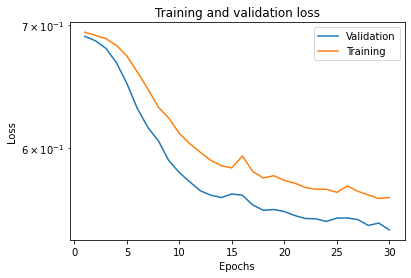

---------------------------------
300 batch size and 0.002 learning rate
---------------------------------
Epoch 1/30
14/14 [==============================] - 1s 11ms/step - loss: 0.6929 - accuracy: 0.5206 - val_loss: 0.6906 - val_accuracy: 0.5463
Epoch 2/30
14/14 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.5240 - val_loss: 0.6848 - val_accuracy: 0.5485
Epoch 3/30
14/14 [==============================] - 0s 3ms/step - loss: 0.6844 - accuracy: 0.5338 - val_loss: 0.6771 - val_accuracy: 0.5859
Epoch 4/30
14/14 [==============================] - 0s 3ms/step - loss: 0.6727 - accuracy: 0.6027 - val_loss: 0.6610 - val_accuracy: 0.6454
Epoch 5/30
14/14 [==============================] - 0s 3ms/step - loss: 0.6545 - accuracy: 0.6402 - val_loss: 0.6443 - val_accuracy: 0.6388
Epoch 6/30
14/14 [==============================] - 0s 3ms/step - loss: 0.6349 - accuracy: 0.6505 - val_loss: 0.6139 - val_accuracy: 0.6696
Epoch 7/30
14/14 [==============================] - 

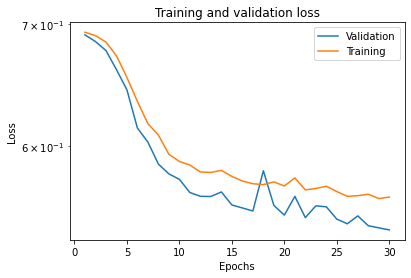

---------------------------------
300 batch size and 0.0025 learning rate
---------------------------------
Epoch 1/30
14/14 [==============================] - 1s 13ms/step - loss: 0.6927 - accuracy: 0.5299 - val_loss: 0.6921 - val_accuracy: 0.5154
Epoch 2/30
14/14 [==============================] - 0s 4ms/step - loss: 0.6896 - accuracy: 0.5451 - val_loss: 0.6870 - val_accuracy: 0.5793
Epoch 3/30
14/14 [==============================] - 0s 4ms/step - loss: 0.6839 - accuracy: 0.5877 - val_loss: 0.6776 - val_accuracy: 0.6278
Epoch 4/30
14/14 [==============================] - 0s 3ms/step - loss: 0.6704 - accuracy: 0.6061 - val_loss: 0.6595 - val_accuracy: 0.6476
Epoch 5/30
14/14 [==============================] - 0s 3ms/step - loss: 0.6497 - accuracy: 0.6404 - val_loss: 0.6472 - val_accuracy: 0.6233
Epoch 6/30
14/14 [==============================] - 0s 4ms/step - loss: 0.6302 - accuracy: 0.6615 - val_loss: 0.6221 - val_accuracy: 0.6630
Epoch 7/30
14/14 [==============================] -

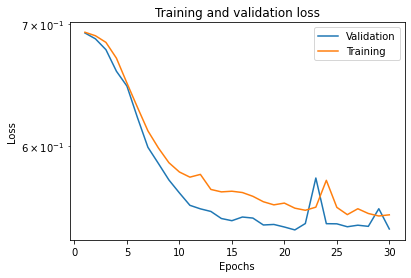

---------------------------------
350 batch size and 0.0005 learning rate
---------------------------------
Epoch 1/30
12/12 [==============================] - 1s 14ms/step - loss: 0.6914 - accuracy: 0.5434 - val_loss: 0.6901 - val_accuracy: 0.5903
Epoch 2/30
12/12 [==============================] - 0s 4ms/step - loss: 0.6894 - accuracy: 0.5833 - val_loss: 0.6884 - val_accuracy: 0.5903
Epoch 3/30
12/12 [==============================] - 0s 3ms/step - loss: 0.6874 - accuracy: 0.5919 - val_loss: 0.6864 - val_accuracy: 0.5903
Epoch 4/30
12/12 [==============================] - 0s 4ms/step - loss: 0.6850 - accuracy: 0.6017 - val_loss: 0.6845 - val_accuracy: 0.6035
Epoch 5/30
12/12 [==============================] - 0s 4ms/step - loss: 0.6824 - accuracy: 0.6093 - val_loss: 0.6818 - val_accuracy: 0.6057
Epoch 6/30
12/12 [==============================] - 0s 4ms/step - loss: 0.6795 - accuracy: 0.6194 - val_loss: 0.6784 - val_accuracy: 0.6211
Epoch 7/30
12/12 [==============================] -

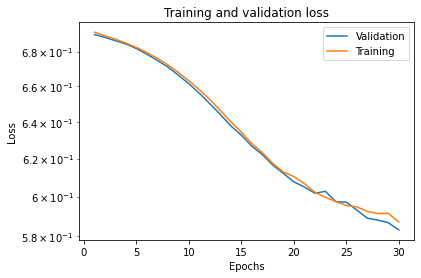

---------------------------------
350 batch size and 0.001 learning rate
---------------------------------
Epoch 1/30
12/12 [==============================] - 1s 12ms/step - loss: 0.6932 - accuracy: 0.5238 - val_loss: 0.6918 - val_accuracy: 0.5485
Epoch 2/30
12/12 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5240 - val_loss: 0.6904 - val_accuracy: 0.5485
Epoch 3/30
12/12 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5240 - val_loss: 0.6892 - val_accuracy: 0.5485
Epoch 4/30
12/12 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5240 - val_loss: 0.6881 - val_accuracy: 0.5485
Epoch 5/30
12/12 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5240 - val_loss: 0.6868 - val_accuracy: 0.5485
Epoch 6/30
12/12 [==============================] - 0s 4ms/step - loss: 0.6898 - accuracy: 0.5240 - val_loss: 0.6852 - val_accuracy: 0.5485
Epoch 7/30
12/12 [==============================] - 

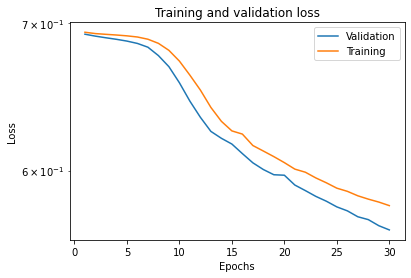

---------------------------------
350 batch size and 0.0015 learning rate
---------------------------------
Epoch 1/30
12/12 [==============================] - 0s 12ms/step - loss: 0.6881 - accuracy: 0.5588 - val_loss: 0.6820 - val_accuracy: 0.6211
Epoch 2/30
12/12 [==============================] - 0s 3ms/step - loss: 0.6836 - accuracy: 0.5895 - val_loss: 0.6760 - val_accuracy: 0.6366
Epoch 3/30
12/12 [==============================] - 0s 3ms/step - loss: 0.6786 - accuracy: 0.6025 - val_loss: 0.6685 - val_accuracy: 0.6366
Epoch 4/30
12/12 [==============================] - 0s 3ms/step - loss: 0.6704 - accuracy: 0.6186 - val_loss: 0.6592 - val_accuracy: 0.6674
Epoch 5/30
12/12 [==============================] - 0s 3ms/step - loss: 0.6595 - accuracy: 0.6412 - val_loss: 0.6435 - val_accuracy: 0.6806
Epoch 6/30
12/12 [==============================] - 0s 4ms/step - loss: 0.6452 - accuracy: 0.6463 - val_loss: 0.6253 - val_accuracy: 0.6894
Epoch 7/30
12/12 [==============================] -

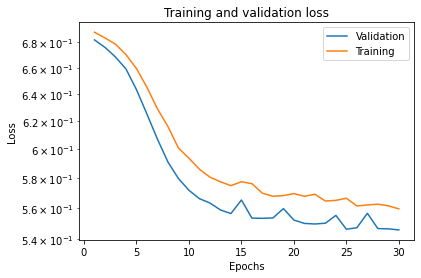

---------------------------------
350 batch size and 0.002 learning rate
---------------------------------
Epoch 1/30
12/12 [==============================] - 1s 12ms/step - loss: 0.6922 - accuracy: 0.5240 - val_loss: 0.6896 - val_accuracy: 0.5485
Epoch 2/30
12/12 [==============================] - 0s 4ms/step - loss: 0.6905 - accuracy: 0.5240 - val_loss: 0.6860 - val_accuracy: 0.5485
Epoch 3/30
12/12 [==============================] - 0s 4ms/step - loss: 0.6886 - accuracy: 0.5240 - val_loss: 0.6827 - val_accuracy: 0.5485
Epoch 4/30
12/12 [==============================] - 0s 3ms/step - loss: 0.6842 - accuracy: 0.5240 - val_loss: 0.6737 - val_accuracy: 0.5485
Epoch 5/30
12/12 [==============================] - 0s 4ms/step - loss: 0.6763 - accuracy: 0.5370 - val_loss: 0.6602 - val_accuracy: 0.5815
Epoch 6/30
12/12 [==============================] - 0s 4ms/step - loss: 0.6654 - accuracy: 0.5988 - val_loss: 0.6469 - val_accuracy: 0.6167
Epoch 7/30
12/12 [==============================] - 

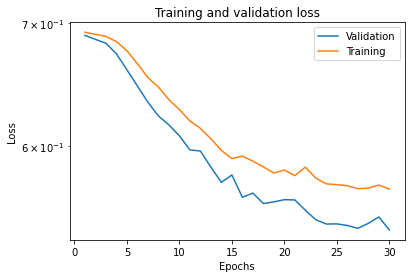

---------------------------------
350 batch size and 0.0025 learning rate
---------------------------------
Epoch 1/30
12/12 [==============================] - 1s 16ms/step - loss: 0.6916 - accuracy: 0.5230 - val_loss: 0.6877 - val_accuracy: 0.5485
Epoch 2/30
12/12 [==============================] - 0s 5ms/step - loss: 0.6890 - accuracy: 0.5240 - val_loss: 0.6842 - val_accuracy: 0.5485
Epoch 3/30
12/12 [==============================] - 0s 4ms/step - loss: 0.6852 - accuracy: 0.5240 - val_loss: 0.6796 - val_accuracy: 0.5485
Epoch 4/30
12/12 [==============================] - 0s 5ms/step - loss: 0.6783 - accuracy: 0.5569 - val_loss: 0.6704 - val_accuracy: 0.6035
Epoch 5/30
12/12 [==============================] - 0s 4ms/step - loss: 0.6675 - accuracy: 0.6034 - val_loss: 0.6586 - val_accuracy: 0.6211
Epoch 6/30
12/12 [==============================] - 0s 5ms/step - loss: 0.6548 - accuracy: 0.6304 - val_loss: 0.6442 - val_accuracy: 0.6586
Epoch 7/30
12/12 [==============================] -

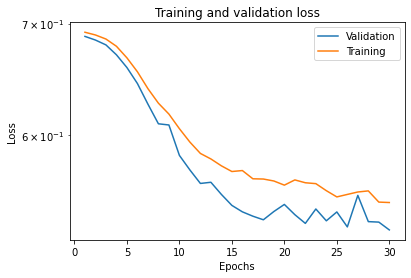

---------------------------------
400 batch size and 0.0005 learning rate
---------------------------------
Epoch 1/30
11/11 [==============================] - 1s 15ms/step - loss: 0.6932 - accuracy: 0.5240 - val_loss: 0.6918 - val_accuracy: 0.5485
Epoch 2/30
11/11 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.5240 - val_loss: 0.6912 - val_accuracy: 0.5485
Epoch 3/30
11/11 [==============================] - 0s 4ms/step - loss: 0.6922 - accuracy: 0.5240 - val_loss: 0.6907 - val_accuracy: 0.5485
Epoch 4/30
11/11 [==============================] - 0s 4ms/step - loss: 0.6920 - accuracy: 0.5240 - val_loss: 0.6904 - val_accuracy: 0.5485
Epoch 5/30
11/11 [==============================] - 0s 4ms/step - loss: 0.6918 - accuracy: 0.5240 - val_loss: 0.6899 - val_accuracy: 0.5485
Epoch 6/30
11/11 [==============================] - 0s 4ms/step - loss: 0.6916 - accuracy: 0.5240 - val_loss: 0.6894 - val_accuracy: 0.5485
Epoch 7/30
11/11 [==============================] -

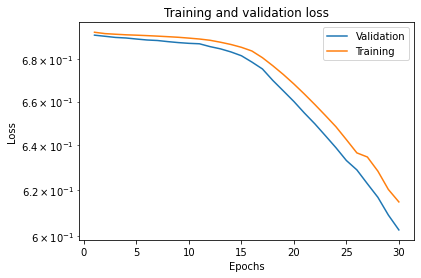

---------------------------------
400 batch size and 0.001 learning rate
---------------------------------
Epoch 1/30
11/11 [==============================] - 1s 13ms/step - loss: 0.6976 - accuracy: 0.4794 - val_loss: 0.6966 - val_accuracy: 0.4493
Epoch 2/30
11/11 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.5091 - val_loss: 0.6934 - val_accuracy: 0.4934
Epoch 3/30
11/11 [==============================] - 0s 4ms/step - loss: 0.6923 - accuracy: 0.5360 - val_loss: 0.6925 - val_accuracy: 0.5110
Epoch 4/30
11/11 [==============================] - 0s 4ms/step - loss: 0.6916 - accuracy: 0.5449 - val_loss: 0.6925 - val_accuracy: 0.5066
Epoch 5/30
11/11 [==============================] - 0s 5ms/step - loss: 0.6908 - accuracy: 0.5532 - val_loss: 0.6918 - val_accuracy: 0.5132
Epoch 6/30
11/11 [==============================] - 0s 5ms/step - loss: 0.6898 - accuracy: 0.5615 - val_loss: 0.6910 - val_accuracy: 0.5220
Epoch 7/30
11/11 [==============================] - 

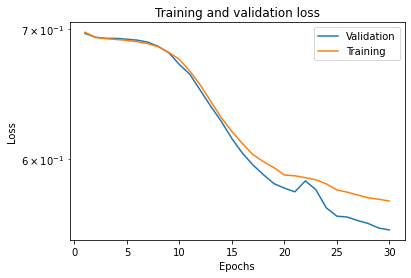

---------------------------------
400 batch size and 0.0015 learning rate
---------------------------------
Epoch 1/30
11/11 [==============================] - 1s 14ms/step - loss: 0.6936 - accuracy: 0.5240 - val_loss: 0.6903 - val_accuracy: 0.5485
Epoch 2/30
11/11 [==============================] - 0s 4ms/step - loss: 0.6920 - accuracy: 0.5240 - val_loss: 0.6895 - val_accuracy: 0.5485
Epoch 3/30
11/11 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5240 - val_loss: 0.6884 - val_accuracy: 0.5485
Epoch 4/30
11/11 [==============================] - 0s 4ms/step - loss: 0.6904 - accuracy: 0.5240 - val_loss: 0.6874 - val_accuracy: 0.5507
Epoch 5/30
11/11 [==============================] - 0s 4ms/step - loss: 0.6894 - accuracy: 0.5331 - val_loss: 0.6860 - val_accuracy: 0.5639
Epoch 6/30
11/11 [==============================] - 0s 3ms/step - loss: 0.6875 - accuracy: 0.5522 - val_loss: 0.6833 - val_accuracy: 0.5859
Epoch 7/30
11/11 [==============================] -

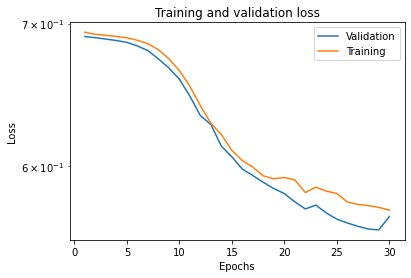

---------------------------------
400 batch size and 0.002 learning rate
---------------------------------
Epoch 1/30
11/11 [==============================] - 1s 23ms/step - loss: 0.6938 - accuracy: 0.5225 - val_loss: 0.6896 - val_accuracy: 0.5463
Epoch 2/30
11/11 [==============================] - 0s 5ms/step - loss: 0.6906 - accuracy: 0.5248 - val_loss: 0.6858 - val_accuracy: 0.5507
Epoch 3/30
11/11 [==============================] - 0s 8ms/step - loss: 0.6881 - accuracy: 0.5407 - val_loss: 0.6822 - val_accuracy: 0.6013
Epoch 4/30
11/11 [==============================] - 0s 9ms/step - loss: 0.6842 - accuracy: 0.5603 - val_loss: 0.6761 - val_accuracy: 0.6079
Epoch 5/30
11/11 [==============================] - 0s 5ms/step - loss: 0.6782 - accuracy: 0.5882 - val_loss: 0.6680 - val_accuracy: 0.6322
Epoch 6/30
11/11 [==============================] - 0s 6ms/step - loss: 0.6686 - accuracy: 0.6012 - val_loss: 0.6566 - val_accuracy: 0.6432
Epoch 7/30
11/11 [==============================] - 

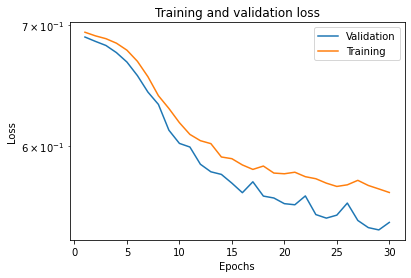

---------------------------------
400 batch size and 0.0025 learning rate
---------------------------------
Epoch 1/30
11/11 [==============================] - 2s 37ms/step - loss: 0.6919 - accuracy: 0.5159 - val_loss: 0.6887 - val_accuracy: 0.6057
Epoch 2/30
11/11 [==============================] - 0s 9ms/step - loss: 0.6879 - accuracy: 0.5662 - val_loss: 0.6830 - val_accuracy: 0.6278
Epoch 3/30
11/11 [==============================] - 0s 7ms/step - loss: 0.6810 - accuracy: 0.6025 - val_loss: 0.6753 - val_accuracy: 0.6233
Epoch 4/30
11/11 [==============================] - 0s 6ms/step - loss: 0.6719 - accuracy: 0.6206 - val_loss: 0.6652 - val_accuracy: 0.6674
Epoch 5/30
11/11 [==============================] - 0s 8ms/step - loss: 0.6605 - accuracy: 0.6456 - val_loss: 0.6514 - val_accuracy: 0.6762
Epoch 6/30
11/11 [==============================] - 0s 8ms/step - loss: 0.6464 - accuracy: 0.6586 - val_loss: 0.6404 - val_accuracy: 0.6784
Epoch 7/30
11/11 [==============================] -

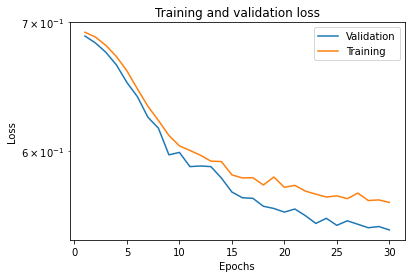

---------------------------------
450 batch size and 0.0005 learning rate
---------------------------------
Epoch 1/30
10/10 [==============================] - 1s 20ms/step - loss: 0.6930 - accuracy: 0.5123 - val_loss: 0.6929 - val_accuracy: 0.5308
Epoch 2/30
10/10 [==============================] - 0s 7ms/step - loss: 0.6928 - accuracy: 0.5189 - val_loss: 0.6928 - val_accuracy: 0.5396
Epoch 3/30
10/10 [==============================] - 0s 8ms/step - loss: 0.6926 - accuracy: 0.5238 - val_loss: 0.6926 - val_accuracy: 0.5485
Epoch 4/30
10/10 [==============================] - 0s 8ms/step - loss: 0.6924 - accuracy: 0.5262 - val_loss: 0.6923 - val_accuracy: 0.5485
Epoch 5/30
10/10 [==============================] - 0s 6ms/step - loss: 0.6921 - accuracy: 0.5272 - val_loss: 0.6918 - val_accuracy: 0.5485
Epoch 6/30
10/10 [==============================] - 0s 6ms/step - loss: 0.6914 - accuracy: 0.5277 - val_loss: 0.6906 - val_accuracy: 0.5529
Epoch 7/30
10/10 [==============================] -

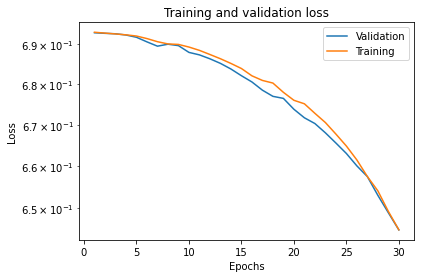

---------------------------------
450 batch size and 0.001 learning rate
---------------------------------
Epoch 1/30
10/10 [==============================] - 1s 17ms/step - loss: 0.6937 - accuracy: 0.5169 - val_loss: 0.6916 - val_accuracy: 0.5485
Epoch 2/30
10/10 [==============================] - 0s 8ms/step - loss: 0.6929 - accuracy: 0.5248 - val_loss: 0.6914 - val_accuracy: 0.5485
Epoch 3/30
10/10 [==============================] - 0s 7ms/step - loss: 0.6926 - accuracy: 0.5240 - val_loss: 0.6907 - val_accuracy: 0.5485
Epoch 4/30
10/10 [==============================] - 0s 6ms/step - loss: 0.6923 - accuracy: 0.5240 - val_loss: 0.6905 - val_accuracy: 0.5485
Epoch 5/30
10/10 [==============================] - 0s 6ms/step - loss: 0.6920 - accuracy: 0.5240 - val_loss: 0.6899 - val_accuracy: 0.5485
Epoch 6/30
10/10 [==============================] - 0s 6ms/step - loss: 0.6918 - accuracy: 0.5240 - val_loss: 0.6901 - val_accuracy: 0.5485
Epoch 7/30
10/10 [==============================] - 

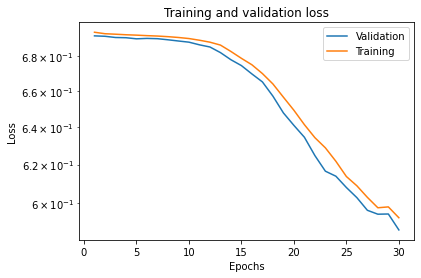

---------------------------------
450 batch size and 0.0015 learning rate
---------------------------------
Epoch 1/30
10/10 [==============================] - 1s 17ms/step - loss: 0.6925 - accuracy: 0.5250 - val_loss: 0.6926 - val_accuracy: 0.5352
Epoch 2/30
10/10 [==============================] - 0s 6ms/step - loss: 0.6906 - accuracy: 0.5248 - val_loss: 0.6905 - val_accuracy: 0.5485
Epoch 3/30
10/10 [==============================] - 0s 6ms/step - loss: 0.6887 - accuracy: 0.5240 - val_loss: 0.6888 - val_accuracy: 0.5485
Epoch 4/30
10/10 [==============================] - 0s 7ms/step - loss: 0.6864 - accuracy: 0.5240 - val_loss: 0.6861 - val_accuracy: 0.5485
Epoch 5/30
10/10 [==============================] - 0s 6ms/step - loss: 0.6828 - accuracy: 0.5316 - val_loss: 0.6807 - val_accuracy: 0.5551
Epoch 6/30
10/10 [==============================] - 0s 7ms/step - loss: 0.6770 - accuracy: 0.5569 - val_loss: 0.6755 - val_accuracy: 0.5749
Epoch 7/30
10/10 [==============================] -

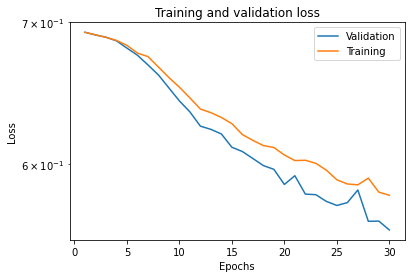

---------------------------------
450 batch size and 0.002 learning rate
---------------------------------
Epoch 1/30
10/10 [==============================] - 1s 18ms/step - loss: 0.6929 - accuracy: 0.5147 - val_loss: 0.6911 - val_accuracy: 0.5507
Epoch 2/30
10/10 [==============================] - 0s 7ms/step - loss: 0.6916 - accuracy: 0.5270 - val_loss: 0.6887 - val_accuracy: 0.5441
Epoch 3/30
10/10 [==============================] - 0s 6ms/step - loss: 0.6901 - accuracy: 0.5270 - val_loss: 0.6856 - val_accuracy: 0.5463
Epoch 4/30
10/10 [==============================] - 0s 7ms/step - loss: 0.6872 - accuracy: 0.5360 - val_loss: 0.6817 - val_accuracy: 0.6189
Epoch 5/30
10/10 [==============================] - 0s 6ms/step - loss: 0.6822 - accuracy: 0.5934 - val_loss: 0.6673 - val_accuracy: 0.6256
Epoch 6/30
10/10 [==============================] - 0s 6ms/step - loss: 0.6684 - accuracy: 0.6181 - val_loss: 0.6540 - val_accuracy: 0.6542
Epoch 7/30
10/10 [==============================] - 

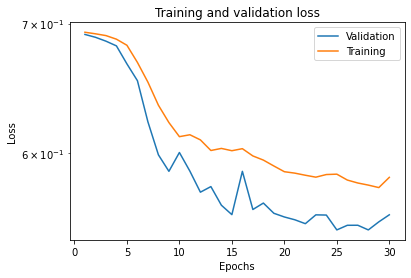

---------------------------------
450 batch size and 0.0025 learning rate
---------------------------------
Epoch 1/30
10/10 [==============================] - 1s 17ms/step - loss: 0.6928 - accuracy: 0.5147 - val_loss: 0.6894 - val_accuracy: 0.5485
Epoch 2/30
10/10 [==============================] - 0s 6ms/step - loss: 0.6904 - accuracy: 0.5243 - val_loss: 0.6878 - val_accuracy: 0.5485
Epoch 3/30
10/10 [==============================] - 0s 6ms/step - loss: 0.6889 - accuracy: 0.5243 - val_loss: 0.6852 - val_accuracy: 0.5463
Epoch 4/30
10/10 [==============================] - 0s 7ms/step - loss: 0.6880 - accuracy: 0.5596 - val_loss: 0.6858 - val_accuracy: 0.5903
Epoch 5/30
10/10 [==============================] - 0s 6ms/step - loss: 0.6829 - accuracy: 0.5684 - val_loss: 0.6762 - val_accuracy: 0.5441
Epoch 6/30
10/10 [==============================] - 0s 7ms/step - loss: 0.6763 - accuracy: 0.5873 - val_loss: 0.6737 - val_accuracy: 0.6256
Epoch 7/30
10/10 [==============================] -

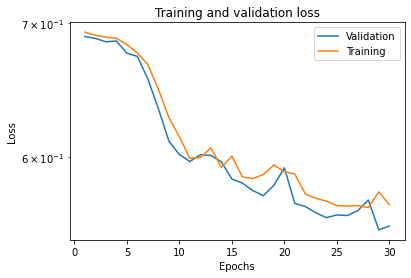

In [30]:
#ajuste hiperparametros batchsize y learning rate

op_batchsize = list(range(50,500,50))
op_learning_rate = list(np.arange(0.0005, 0.003, 0.0005))


model_lr_batch = []
for batch in op_batchsize:
    for lr in op_learning_rate:
    
        print('---------------------------------')
        print(f'{batch} batch size and {lr} learning rate')
        print('---------------------------------')

        model = create_model(neurons = 10, 
                             layers = 5, 
                             optimizer = optimizers.Adam(learning_rate=lr), 
                             activation = 'relu', 
                             batch_size=batch)
        
        plot_metric(model.history, 'loss')
        model_lr_batch.append((batch, lr, max(model.history.history['val_accuracy'])))

In [31]:
model_lr_batch

[(50, 0.0005, 0.7202643156051636),
 (50, 0.001, 0.7356828451156616),
 (50, 0.0015, 0.7334801554679871),
 (50, 0.002, 0.7444933652877808),
 (50, 0.0025, 0.7334801554679871),
 (100, 0.0005, 0.7180616855621338),
 (100, 0.001, 0.7224669456481934),
 (100, 0.0015, 0.7246695756912231),
 (100, 0.002, 0.7290748953819275),
 (100, 0.0025, 0.7224669456481934),
 (150, 0.0005, 0.7070484757423401),
 (150, 0.001, 0.7224669456481934),
 (150, 0.0015, 0.7246695756912231),
 (150, 0.002, 0.7334801554679871),
 (150, 0.0025, 0.7400881052017212),
 (200, 0.0005, 0.7136563658714294),
 (200, 0.001, 0.7202643156051636),
 (200, 0.0015, 0.7224669456481934),
 (200, 0.002, 0.7268722653388977),
 (200, 0.0025, 0.7268722653388977),
 (250, 0.0005, 0.6607929468154907),
 (250, 0.001, 0.7246695756912231),
 (250, 0.0015, 0.7400881052017212),
 (250, 0.002, 0.7334801554679871),
 (250, 0.0025, 0.7334801554679871),
 (300, 0.0005, 0.7092511057853699),
 (300, 0.001, 0.7048457860946655),
 (300, 0.0015, 0.7268722653388977),
 (300, 0

## Dos candidatos:

* 350 batch size and 0.001 learning rate 
* 200 batch size and 0.0005 learning rate 

**Selecciono 200 batch size and 0.0005 learning rate para evitar las spikes en la grafica de coste**

Epoch 1/30
21/21 [==============================] - 1s 10ms/step - loss: 0.6924 - accuracy: 0.5176 - val_loss: 0.6909 - val_accuracy: 0.5529
Epoch 2/30
21/21 [==============================] - 0s 5ms/step - loss: 0.6915 - accuracy: 0.5240 - val_loss: 0.6896 - val_accuracy: 0.5463
Epoch 3/30
21/21 [==============================] - 0s 5ms/step - loss: 0.6906 - accuracy: 0.5233 - val_loss: 0.6885 - val_accuracy: 0.5485
Epoch 4/30
21/21 [==============================] - 0s 5ms/step - loss: 0.6894 - accuracy: 0.5245 - val_loss: 0.6868 - val_accuracy: 0.5507
Epoch 5/30
21/21 [==============================] - 0s 5ms/step - loss: 0.6880 - accuracy: 0.5255 - val_loss: 0.6849 - val_accuracy: 0.5485
Epoch 6/30
21/21 [==============================] - 0s 4ms/step - loss: 0.6862 - accuracy: 0.5333 - val_loss: 0.6823 - val_accuracy: 0.5507
Epoch 7/30
21/21 [==============================] - 0s 6ms/step - loss: 0.6839 - accuracy: 0.5613 - val_loss: 0.6793 - val_accuracy: 0.5573
Epoch 8/30
21/21 [=

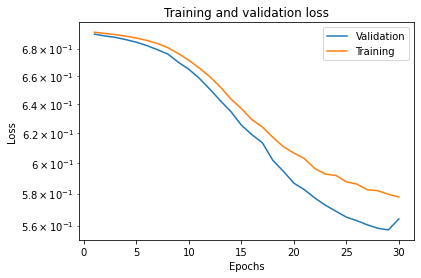

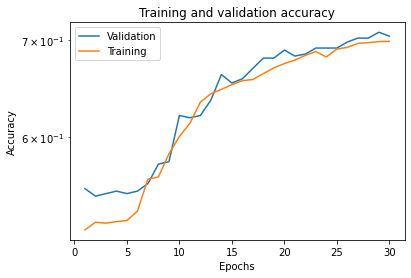

In [37]:
#Modelo final

model = create_model(neurons = 10, 
             layers = 5, 
             optimizer = optimizers.Adam(learning_rate=0.0005), 
             activation = 'relu', 
             batch_size=200,
             epochs = 30)

plot_metric(model.history, 'loss')
plot_metric(model.history, 'accuracy')

In [35]:
joblib.dump(model, 'modelo_entrenado_ajustado.pkl')

INFO:tensorflow:Assets written to: ram://b91ef9276b7941bfa2940c3aa72f54dd/assets


['modelo_entrenado_ajustado.pkl']

In [36]:
#Posibles mejoras: 
#  - droput y regularizadores
#  - gridsearch usando sklearn

## Prediccion en el conjunto de test

In [55]:
results_proba = model.predict(X_test)
results_pred = [1 if proba[0] < 0.5 else 0 for proba in results_proba ]

36/36 [==============================] - 0s 2ms/step


In [52]:
y_test

1908    0.0
1424    0.0
2246    1.0
3707    1.0
1388    1.0
       ... 
1507    1.0
39      0.0
5209    1.0
5422    0.0
1874    0.0
Name: winner, Length: 1134, dtype: float64

In [59]:
accuracy = sum(results_pred == y_test) / len(y_test)
print("Precisión: {:.2f}".format(accuracy))

Precisión: 0.70


In [67]:
errores = X_test[results_pred != y_test].index

In [71]:
df_observacion = pd.read_csv('dataset_v1.csv')

In [76]:
df_observacion.iloc[errores].sort_values(by='date_fight', ascending = False)

,Fighter_0,Fighter_1,date_fight,winner,Full Name_0,Height_0,Weight_0,Reach_0,DOB_0,Stance_0,W_0,L_0,D_0,Belt_0,SLpM_0,Str. Acc._0,SApM_0,Str. Def_0,TD Avg._0,TD Acc._0,TD Def._0,Sub. Avg._0,enlaces_0,Full Name_1,Height_1,Weight_1,Reach_1,DOB_1,Stance_1,W_1,L_1,D_1,Belt_1,SLpM_1,Str. Acc._1,SApM_1,Str. Def_1,TD Avg._1,TD Acc._1,TD Def._1,Sub. Avg._1,enlaces_1,edad_pelea_0,edad_pelea_1,name_x,ufc_bouts_0,name_y,ufc_bouts_1,name_x.1,ufc_bouts_0.1,name_y.1,ufc_bouts_1.1
3365,Yohan Lainesse,Gabe Green,2022-01-30,1,Yohan Lainesse,185.0,170.0,193.0,1992-08-14,Orthodox,8.0,1.0,0.0,NaN,4.32,49,4.69,60,2.82,40,0,1.4,http://ufcstats.com/fighter-details/f998f5c102...,Gabe Green,178.0,170.0,185.0,1993-05-02,Switch,11.0,4.0,0.0,NaN,6.20,45,6.92,46,0.83,50,53,0.3,http://ufcstats.com/fighter-details/5eb50529a8...,30.0,29.0,Yohan Lainesse,1.0,Gabe Green,4.0,Yohan Lainesse,1.0,Gabe Green,4.0
3049,Omar Morales,Uros Medic,2022-01-21,1,Omar Morales,180.0,155.0,185.0,1985-10-17,Orthodox,11.0,3.0,0.0,NaN,3.47,38,3.12,61,0.54,100,63,0.0,http://ufcstats.com/fighter-details/a0e6753c42...,Uros Medic,185.0,155.0,180.0,1993-04-25,Southpaw,8.0,1.0,0.0,NaN,8.14,66,3.76,59,0.00,0,66,0.0,http://ufcstats.com/fighter-details/681399317d...,37.0,29.0,Omar Morales,6.0,Uros Medic,3.0,Omar Morales,6.0,Uros Medic,3.0
4792,Luana Carolina,Molly McCann,2022-01-19,1,Luana Carolina,168.0,125.0,175.0,1993-06-11,Orthodox,8.0,3.0,0.0,NaN,4.64,50,3.55,47,0.00,0,82,1.0,http://ufcstats.com/fighter-details/528b071cf3...,Molly McCann,163.0,125.0,157.0,1990-05-04,Orthodox,13.0,4.0,0.0,NaN,5.84,50,4.84,64,1.73,35,46,0.5,http://ufcstats.com/fighter-details/51018a31dd...,29.0,32.0,Luana Carolina,5.0,Molly McCann,9.0,Luana Carolina,5.0,Molly McCann,9.0
3011,Belal Muhammad,Vicente Luque,2022-01-16,0,Belal Muhammad,180.0,170.0,183.0,1988-07-09,Orthodox,21.0,3.0,0.0,NaN,4.31,43,3.58,59,2.29,35,91,0.2,http://ufcstats.com/fighter-details/b1b0729d27...,Vicente Luque,180.0,170.0,193.0,1991-11-27,Orthodox,21.0,9.0,1.0,NaN,5.49,52,5.51,52,0.51,50,61,0.8,http://ufcstats.com/fighter-details/6d4b63c767...,34.0,31.0,Belal Muhammad,16.0,Vicente Luque,19.0,Belal Muhammad,16.0,Vicente Luque,19.0
5316,Miranda Maverick,Sabina Mazo,2022-01-12,0,Miranda Maverick,160.0,125.0,165.0,1997-07-01,Southpaw,12.0,4.0,0.0,NaN,3.62,41,2.69,59,2.10,61,44,0.3,http://ufcstats.com/fighter-details/f29a6350c6...,Sabina Mazo,170.0,125.0,178.0,1997-03-25,Orthodox,9.0,4.0,0.0,NaN,6.10,43,4.35,57,0.65,80,59,0.2,http://ufcstats.com/fighter-details/70d2329a92...,25.0,25.0,Miranda Maverick,5.0,Sabina Mazo,7.0,Miranda Maverick,5.0,Sabina Mazo,7.0
5065,Mackenzie Dern,Tecia Torres,2022-01-09,0,Mackenzie Dern,163.0,115.0,160.0,1993-03-24,Orthodox,12.0,2.0,0.0,NaN,3.16,35,4.35,54,0.46,9,40,2.0,http://ufcstats.com/fighter-details/7447e9f285...,Tecia Torres,155.0,115.0,152.0,1989-08-16,Orthodox,13.0,6.0,0.0,NaN,4.74,48,3.59,61,0.66,14,61,0.1,http://ufcstats.com/fighter-details/31ef8b67e1...,29.0,33.0,Mackenzie Dern,9.0,Tecia Torres,15.0,Mackenzie Dern,9.0,Tecia Torres,15.0
5167,Rose Namajunas,Carla Esparza,2022-01-07,1,Rose Namajunas,165.0,115.0,165.0,1992-06-29,Orthodox,12.0,5.0,0.0,NaN,3.66,40,3.50,60,1.61,57,60,0.6,http://ufcstats.com/fighter-details/47b6324001...,Carla Esparza,155.0,115.0,160.0,1987-10-10,Orthodox,20.0,6.0,0.0,NaN,2.20,40,2.59,55,3.25,35,47,0.3,http://ufcstats.com/fighter-details/d910665038...,30.0,35.0,Rose Namajunas,13.0,Carla Esparza,14.0,Rose Namajunas,13.0,Carla Esparza,14.0
5454,Tim Elliott,Tagir Ulanbekov,2022-01-05,0,Tim Elliott,170.0,125.0,168.0,1986-12-24,Southpaw,19.0,12.0,1.0,NaN,3.58,44,2.86,56,3.73,44,61,1.0,http://ufcstats.com/fighter-details/c96d9178c9...,Tagir Ulanbekov,170.0,125.0,178.0,1991-08-07,Southpaw,14.0,2.0,0.0,NaN,3.42,44,3.36,54,3.67,42,61,0.7,http://ufcstats.com/fighter-details/f00ac08ab0...,36.0,31.0,Tim Elliott,17.0,Tagir Ulanbekov,3.0,Tim Elliott,17.0,Tagir Ulanbekov,3.0
3039,Jalin Turner,Jamie Mullarkey,2022-01-05,0,Jalin Turner,190.0,155.0,196.0,1995-05-18,Southpaw,13.0,5.0,0.0,Na